# Analysis of the results

This notebook will contain the analysis of all of the results from all of the models.

In [25]:
import pandas as pd
import seaborn as sns
from matplotlib import RcParams
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

classification_results_df = pd.read_csv('../results/pretrained_classification_results_half.csv')

classification_results_df

,Model Name,Top 1%,Top 5%
0,PretrainedCustomResNet50_Last2Layers,57.274403,92.461632
1,PretrainedCustomResNet101_Last2Layers,56.734192,92.891342
2,PretrainedCustomResNet152_Last2Layers,58.453037,92.842232
3,PretrainedCustomGoogleNet_Last2Layers,52.891346,92.117867


Creating dataframe of losses for all models

In [26]:
loss_df = pd.read_csv('../models/predefined/state/loss_values_half.csv')
models = loss_df['Model Name'].unique()
loss_df


,Epochs,Training Loss,Testing Loss,Model Name
0,1,2.120475,1.777721,PretrainedCustomResNet50_Last2Layers
1,2,1.594459,1.588729,PretrainedCustomResNet50_Last2Layers
2,3,1.394108,1.477663,PretrainedCustomResNet50_Last2Layers
3,4,1.245547,1.436803,PretrainedCustomResNet50_Last2Layers
4,5,1.143621,1.404907,PretrainedCustomResNet50_Last2Layers
5,6,1.057748,1.372298,PretrainedCustomResNet50_Last2Layers
6,7,0.978655,1.358709,PretrainedCustomResNet50_Last2Layers
7,8,0.911911,1.364102,PretrainedCustomResNet50_Last2Layers
8,9,0.852889,1.361930,PretrainedCustomResNet50_Last2Layers
9,10,0.791429,1.339190,PretrainedCustomResNet50_Last2Layers


In [27]:
models

array(['PretrainedCustomResNet50_Last2Layers',
       'PretrainedCustomResNet101_Last2Layers',
       'PretrainedCustomResNet152_Last2Layers',
       'PretrainedCustomGoogleNet_Last2Layers'], dtype=object)

Setting Seaborn theme and styling

In [28]:
myrcparams = RcParams({'axes.axisbelow': True,
          'axes.edgecolor': 'white',
          'axes.facecolor': '#EAEAF2',
          'axes.grid': True,
          'axes.labelcolor': '.15',
          'axes.linewidth': 0.0,
          'figure.facecolor': 'white',
          'font.family': ['serif'],
          'grid.color': 'white',
          'grid.linestyle': '--',
          'image.cmap': 'Greys',
          'legend.frameon': False,
          'legend.numpoints': 1,
          'legend.scatterpoints': 1,
          'lines.solid_capstyle': 'round',
          'text.color': '.15',
          'xtick.color': '.15',
          'xtick.direction': 'out',
          'xtick.major.size': 0.0,
          'xtick.minor.size': 0.0,
          'ytick.color': '.15',
          'ytick.direction': 'out',
          'ytick.major.size': 0.0,
          'ytick.minor.size': 0.0})

plt.style.library['seaborn-whitegrid']
RcParams.update(myrcparams)

## Plotting Testing and Training Losses for All Models
- Two separate graphs for testing and training loss, allowing a visual comparison of all the models

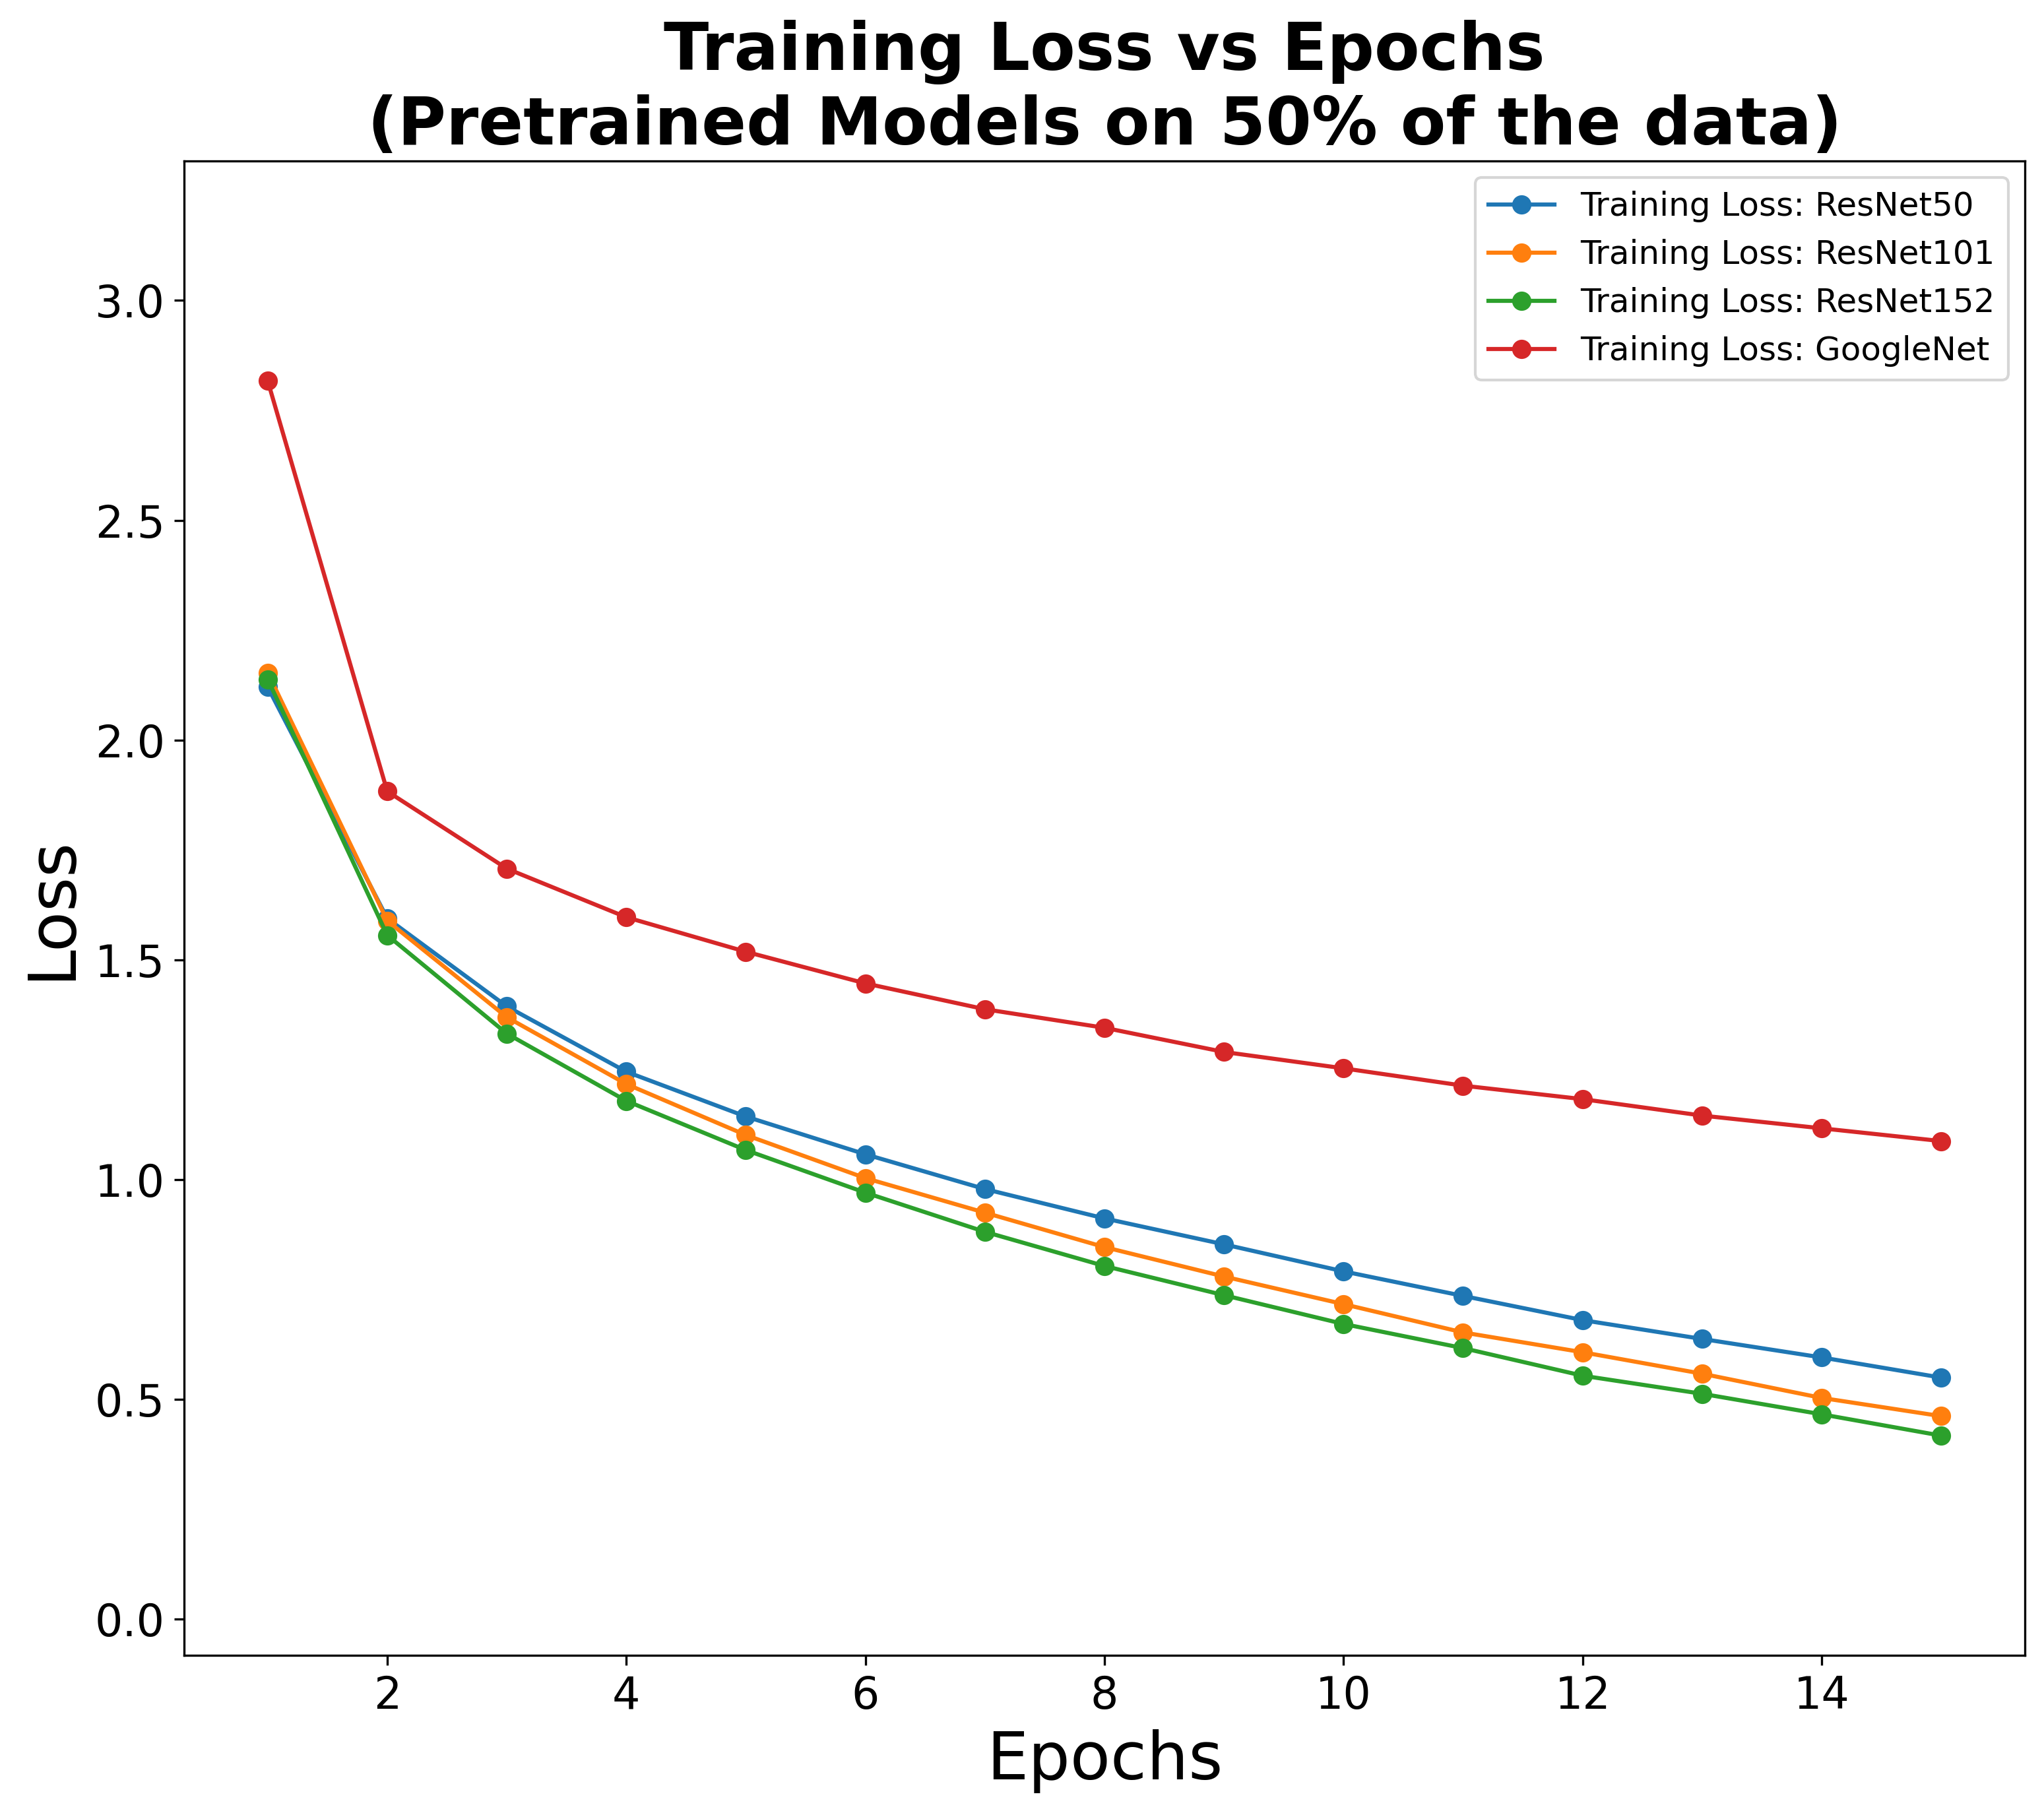

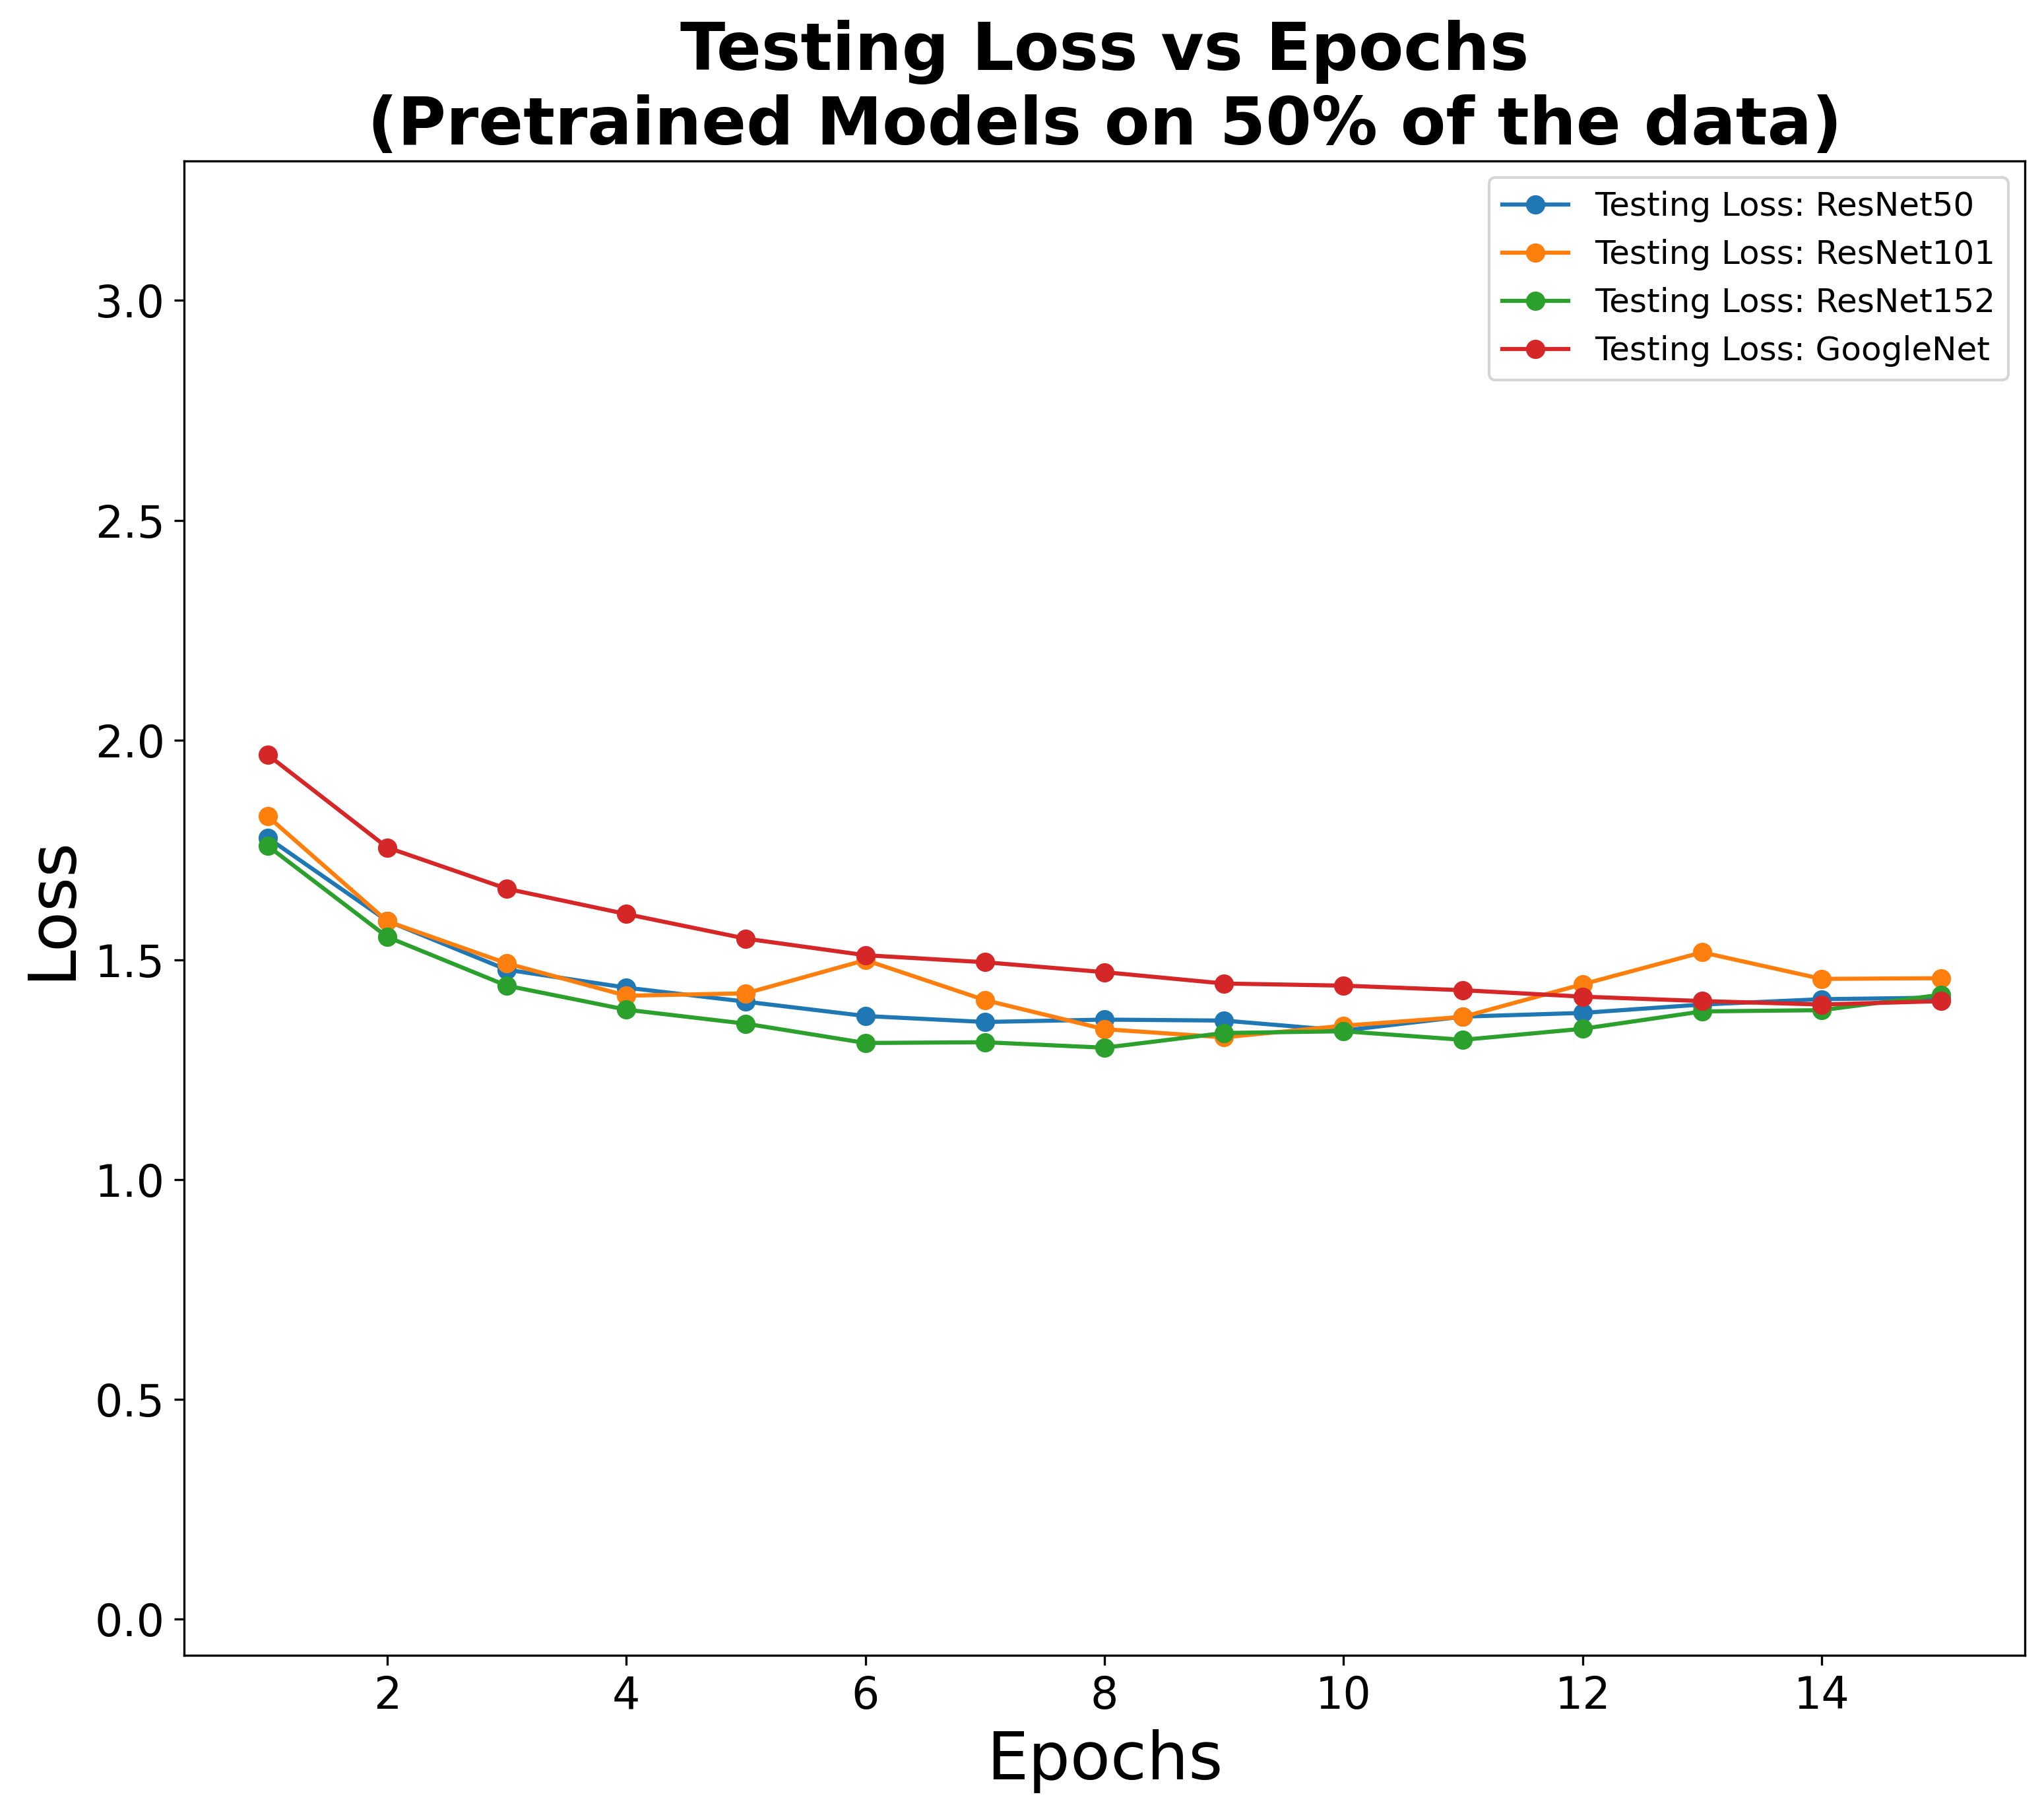

In [29]:
# getting max yval so that plots have same y-axis for better comparison 
max_yval = np.maximum(loss_df['Training Loss'], loss_df['Testing Loss']).max()
min_yval = np.minimum(loss_df['Training Loss'], loss_df['Testing Loss']).min()

# getting the two graphs for testing and training loss 
for loss in ['Training Loss', 'Testing Loss']:
    fig, ax = plt.subplots(figsize = (12,10), dpi = 300)
    for model in models:
        ax.plot(loss_df[loss_df['Model Name'] == model]['Epochs'], 
                loss_df[loss_df['Model Name'] == model][loss], 
                '-o', 
                label = loss + ": " + model.replace('PretrainedCustom', '').replace('_Last2Layers', ''), 
                linewidth = 1.5)
        ax.set_xlabel("Epochs", fontsize = 24)
        ax.set_ylabel("Loss", fontsize = 24)
        ax.tick_params(
            axis = 'both',
            labelsize = 16)
        ax.legend(fontsize = 12)
        ax.set_ylim([min_yval - 0.5, max_yval + 0.5])
        ax.set_title(loss + " vs Epochs\n(Pretrained Models on 50% of the data)", fontsize = 24, fontweight = 'bold')
    plt.savefig("output/Pretrained " + loss + " vs Epochs (50% of the data).jpg", dpi = 300, bbox_inches = 'tight')
    plt.savefig("output/Pretrained " + loss + " vs Epochs (50% of the data).pdf", dpi = 300, bbox_inches = 'tight')    
    plt.show()
        

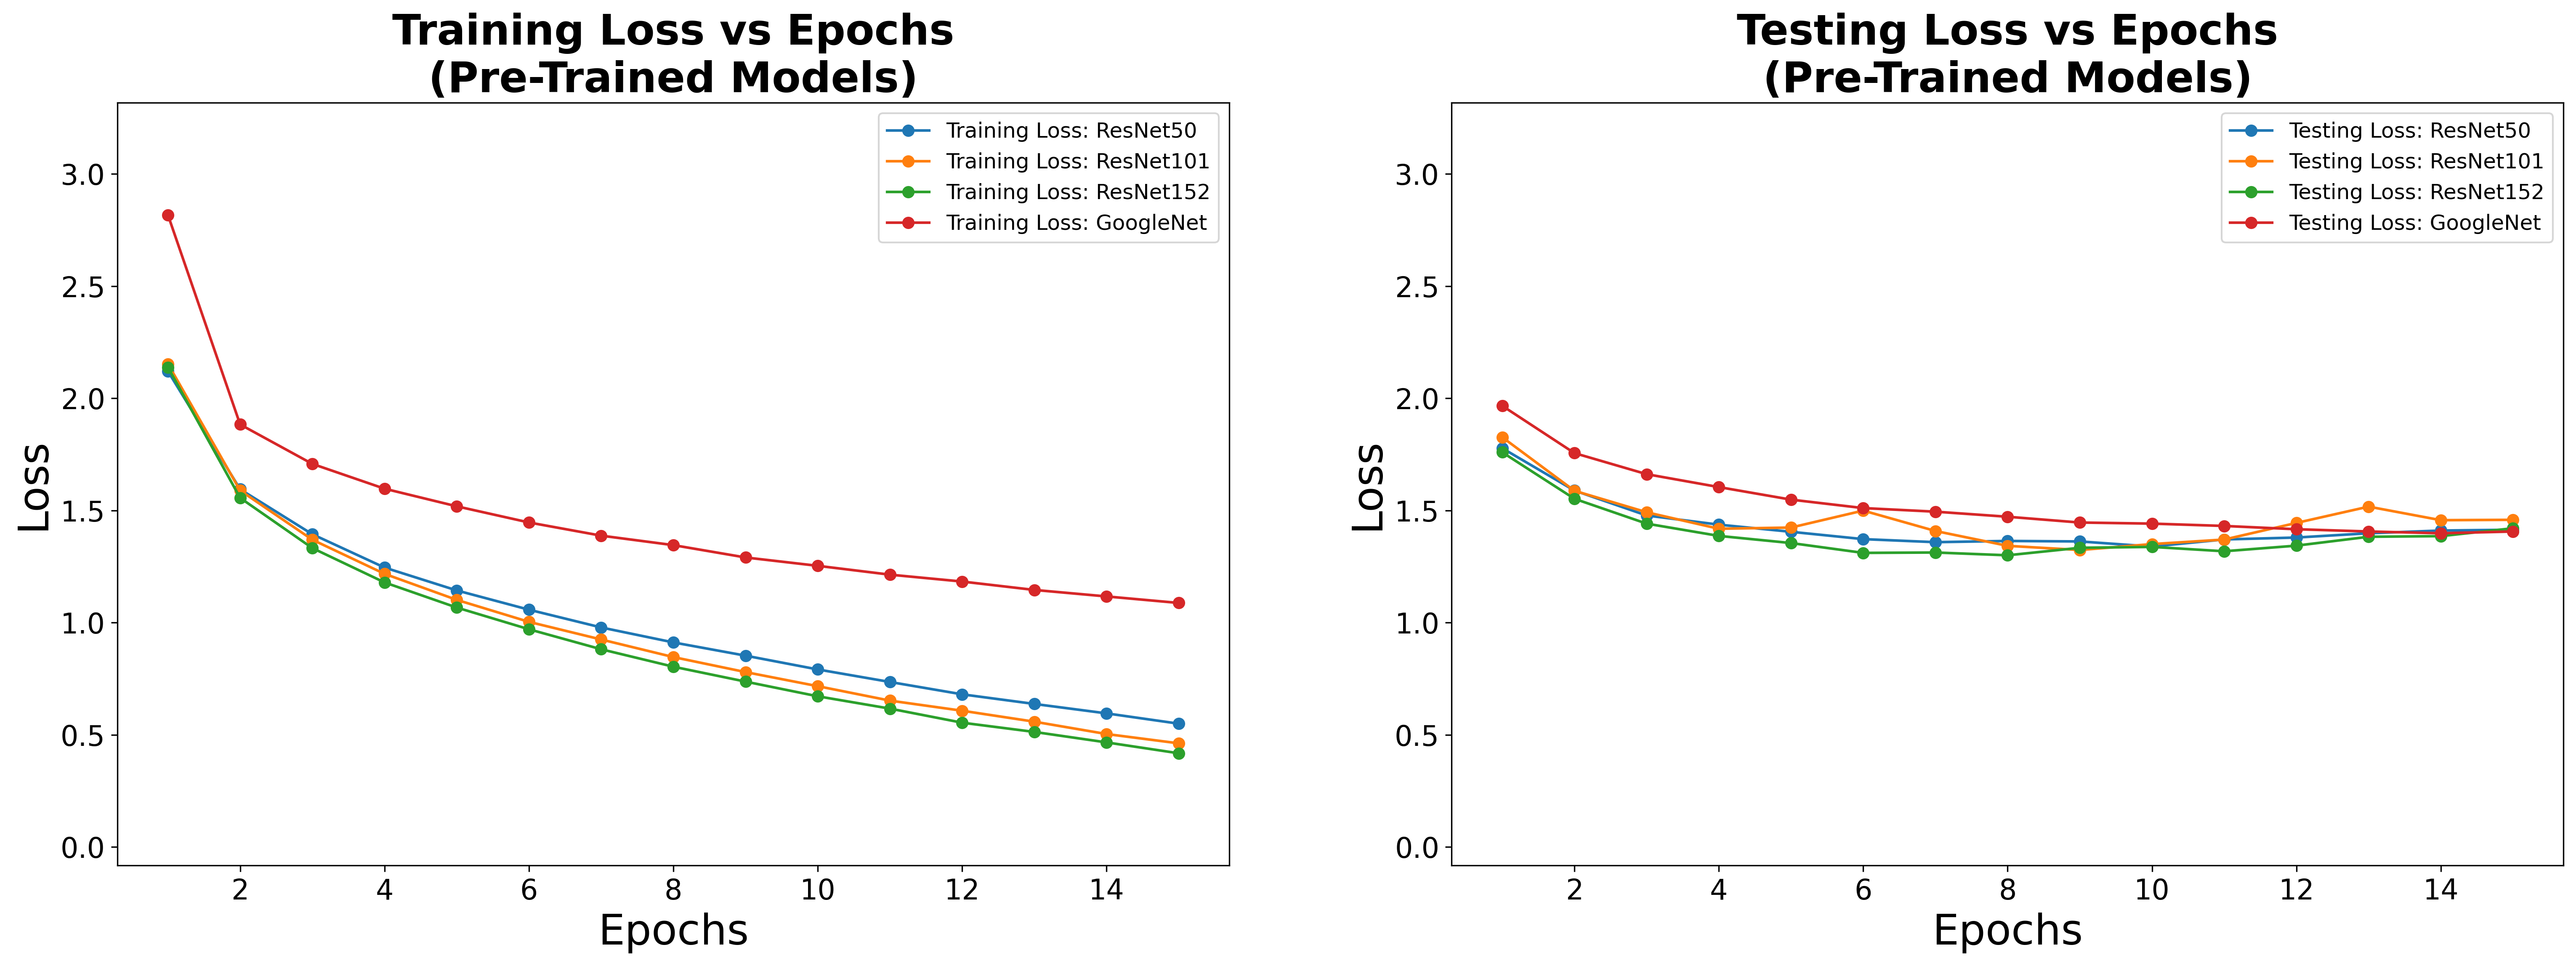

In [30]:
# getting max yval so that plots have same y-axis for better comparison 
max_yval = np.maximum(loss_df['Training Loss'], loss_df['Testing Loss']).max()
min_yval = np.minimum(loss_df['Training Loss'], loss_df['Testing Loss']).min()

# getting the two graphs for testing and training loss 
fig, ax = plt.subplots(1, 2, figsize = (25,8), dpi = 300)
for idx, loss in enumerate(['Training Loss', 'Testing Loss']):
    for model in models:
        ax[idx].plot(loss_df[loss_df['Model Name'] == model]['Epochs'], 
                        loss_df[loss_df['Model Name'] == model][loss], 
                        '-o', 
                        label = loss + ": " + model.replace('PretrainedCustom', '').replace('_Last2Layers', ''), 
                        linewidth = 1.5)
        ax[idx].set_xlabel("Epochs", fontsize = 24)
        ax[idx].set_ylabel("Loss", fontsize = 24)
        ax[idx].tick_params(
            axis = 'both',
            labelsize = 16)
        ax[idx].legend(fontsize = 12)
        ax[idx].set_ylim([min_yval - 0.5, max_yval + 0.5])
        ax[idx].set_title(f"{loss} vs Epochs\n(Pre-Trained Models)", fontsize = 24, fontweight = 'bold')
plt.savefig(f"output/Pretrained {loss} vs Epochs_side_by_side (50% of the data).jpg", dpi = 300, bbox_inches = 'tight')
plt.savefig(f"output/Pretrained {loss} vs Epochs_side_by_side (50% of the data).pdf", dpi = 300, bbox_inches = 'tight')    
plt.show()

# Show specific model results

In [31]:
def generate_model_train_test_loss(model_name):
    filtered_loss_results_df = loss_df[loss_df['Model Name'].str.contains(model_name)]
    filtered_models = [model for model in models if model_name in model]

    # getting max yval so that plots have same y-axis for better comparison 
    max_yval = np.maximum(filtered_loss_results_df['Training Loss'], filtered_loss_results_df['Testing Loss']).max()
    min_yval = np.minimum(filtered_loss_results_df['Training Loss'], filtered_loss_results_df['Testing Loss']).min()

    # getting the two graphs for testing and training loss 
    fig, ax = plt.subplots(1, 2, figsize = (20,8), dpi = 300)
    for idx, loss in enumerate(['Training Loss', 'Testing Loss']):
        for model in filtered_models:
            ax[idx].plot(filtered_loss_results_df[filtered_loss_results_df['Model Name'] == model]['Epochs'], 
                         filtered_loss_results_df[filtered_loss_results_df['Model Name'] == model][loss], 
                         '-o', 
                         label = loss + ": " + model.replace('PretrainedCustom', '').replace('_Last2Layers', ''), 
                         linewidth = 1.5)
            ax[idx].set_xlabel("Epochs", fontsize = 24)
            ax[idx].set_ylabel("Loss", fontsize = 24)
            ax[idx].tick_params(
                axis = 'both',
                labelsize = 16)
            ax[idx].legend(fontsize = 12)
            ax[idx].set_ylim([min_yval - 0.5, max_yval + 0.5])
            ax[idx].set_title(f"{loss} vs Epochs\n(Pre-Trained {model_name})", fontsize = 24, fontweight = 'bold')
    plt.savefig(f"output/Pretrained Loss vs Epochs_{model_name} (50% of the data).jpg", dpi = 300, bbox_inches = 'tight')
    plt.savefig(f"output/Pretrained Loss vs Epochs_{model_name} (50% of the data).pdf", dpi = 300, bbox_inches = 'tight')    
    plt.show()
        

## GoogLeNet Results

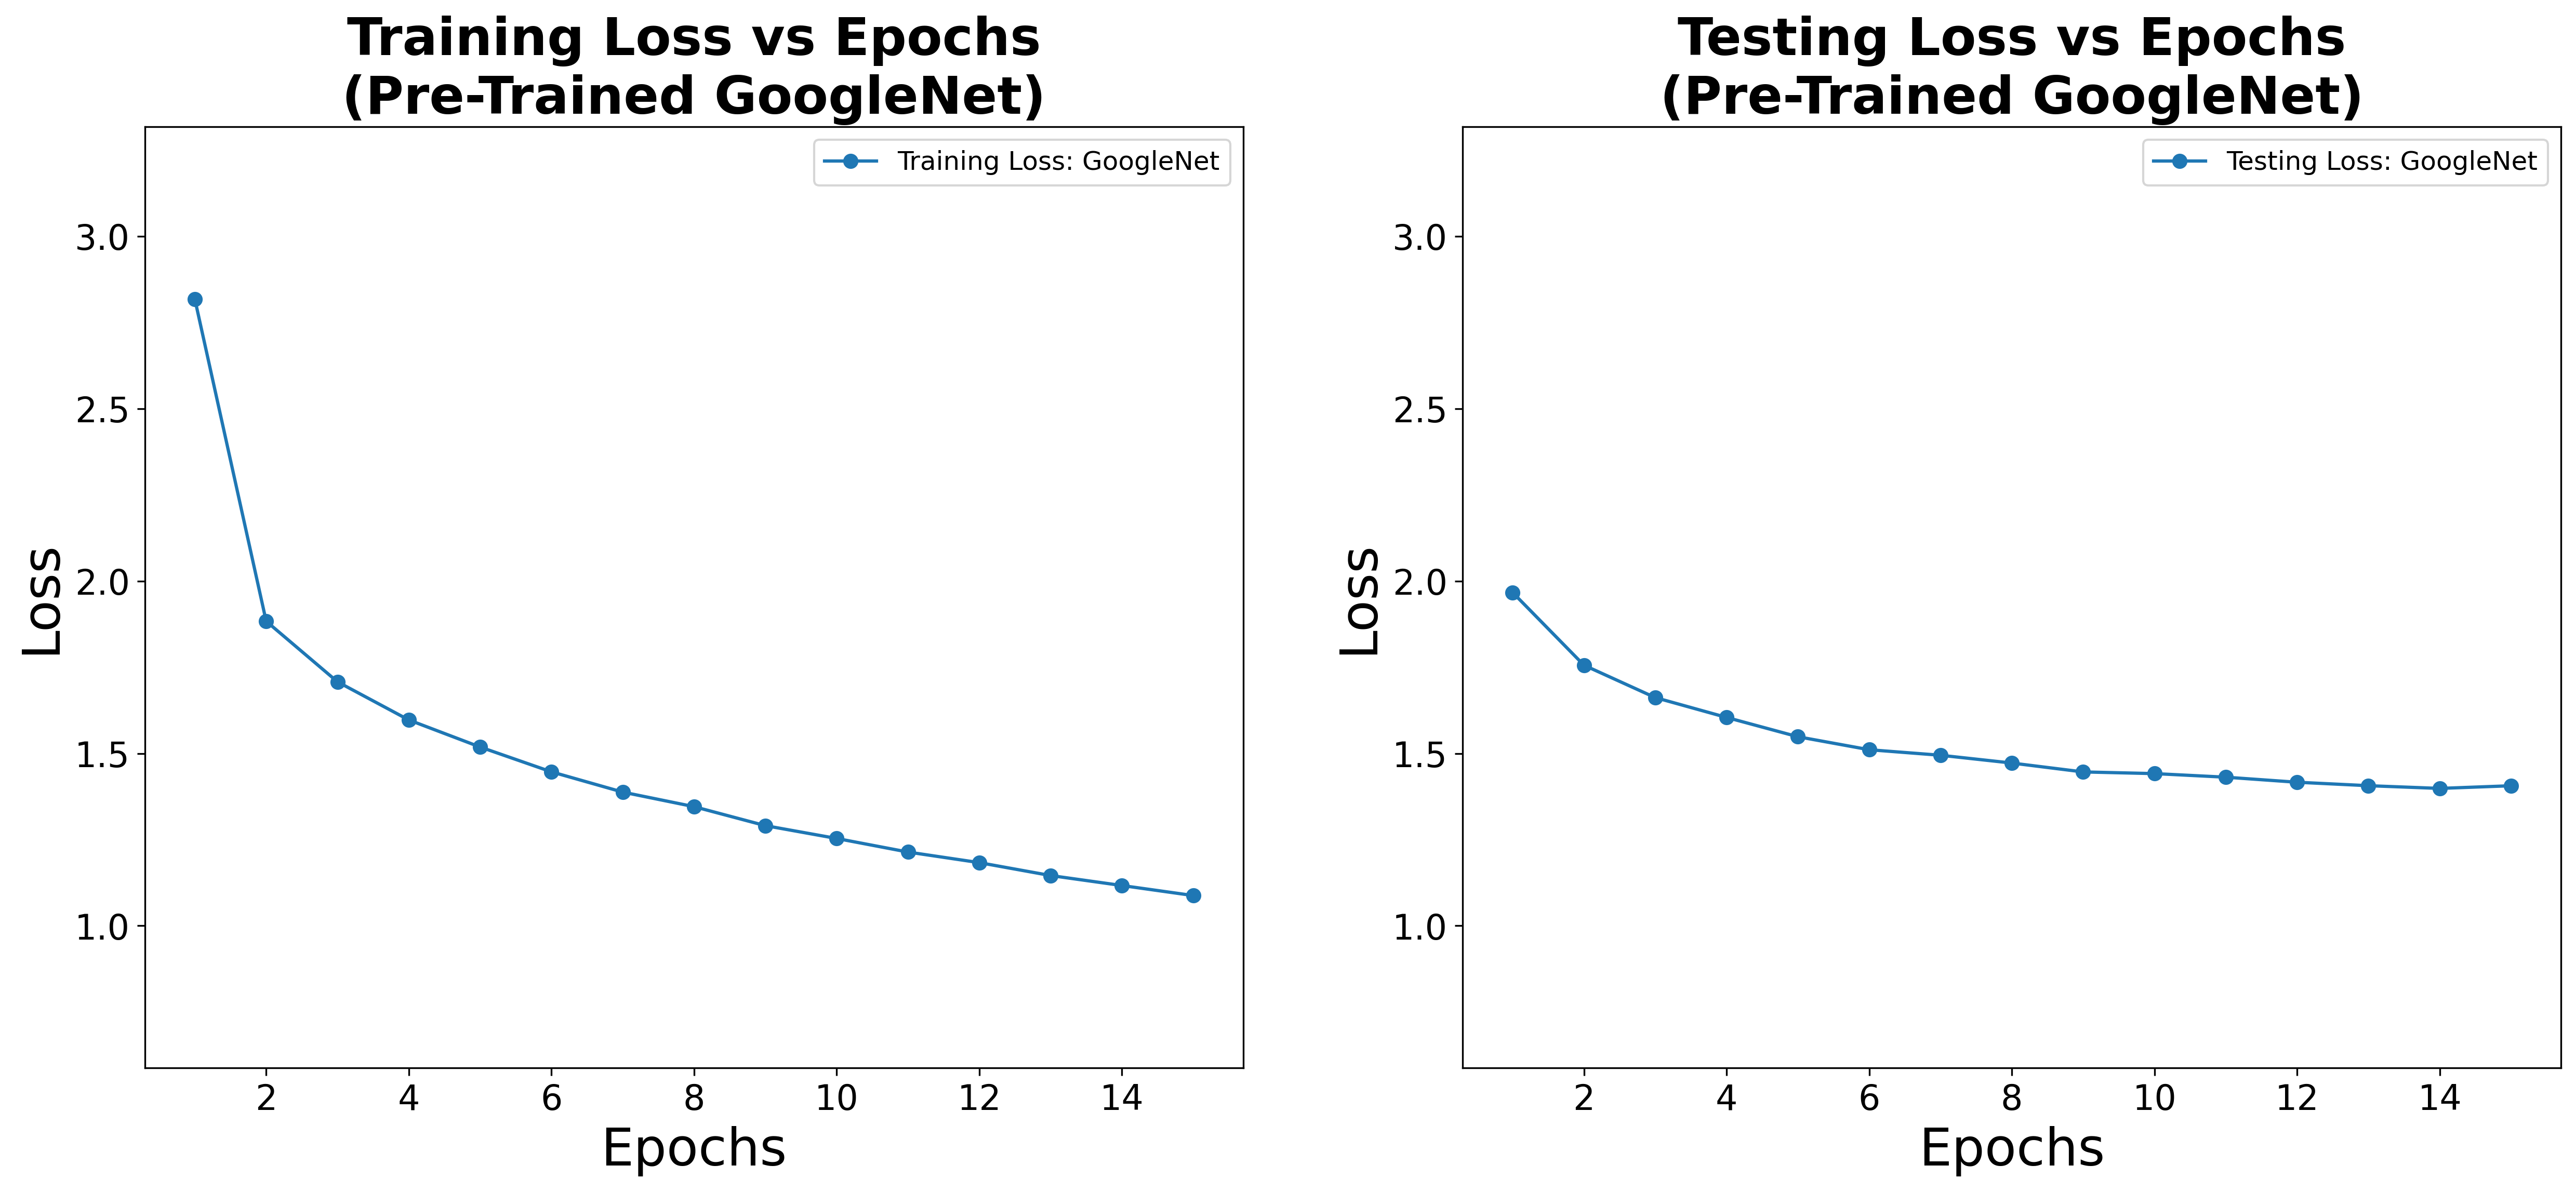

In [32]:
generate_model_train_test_loss('GoogleNet')

## ResNet50 Results

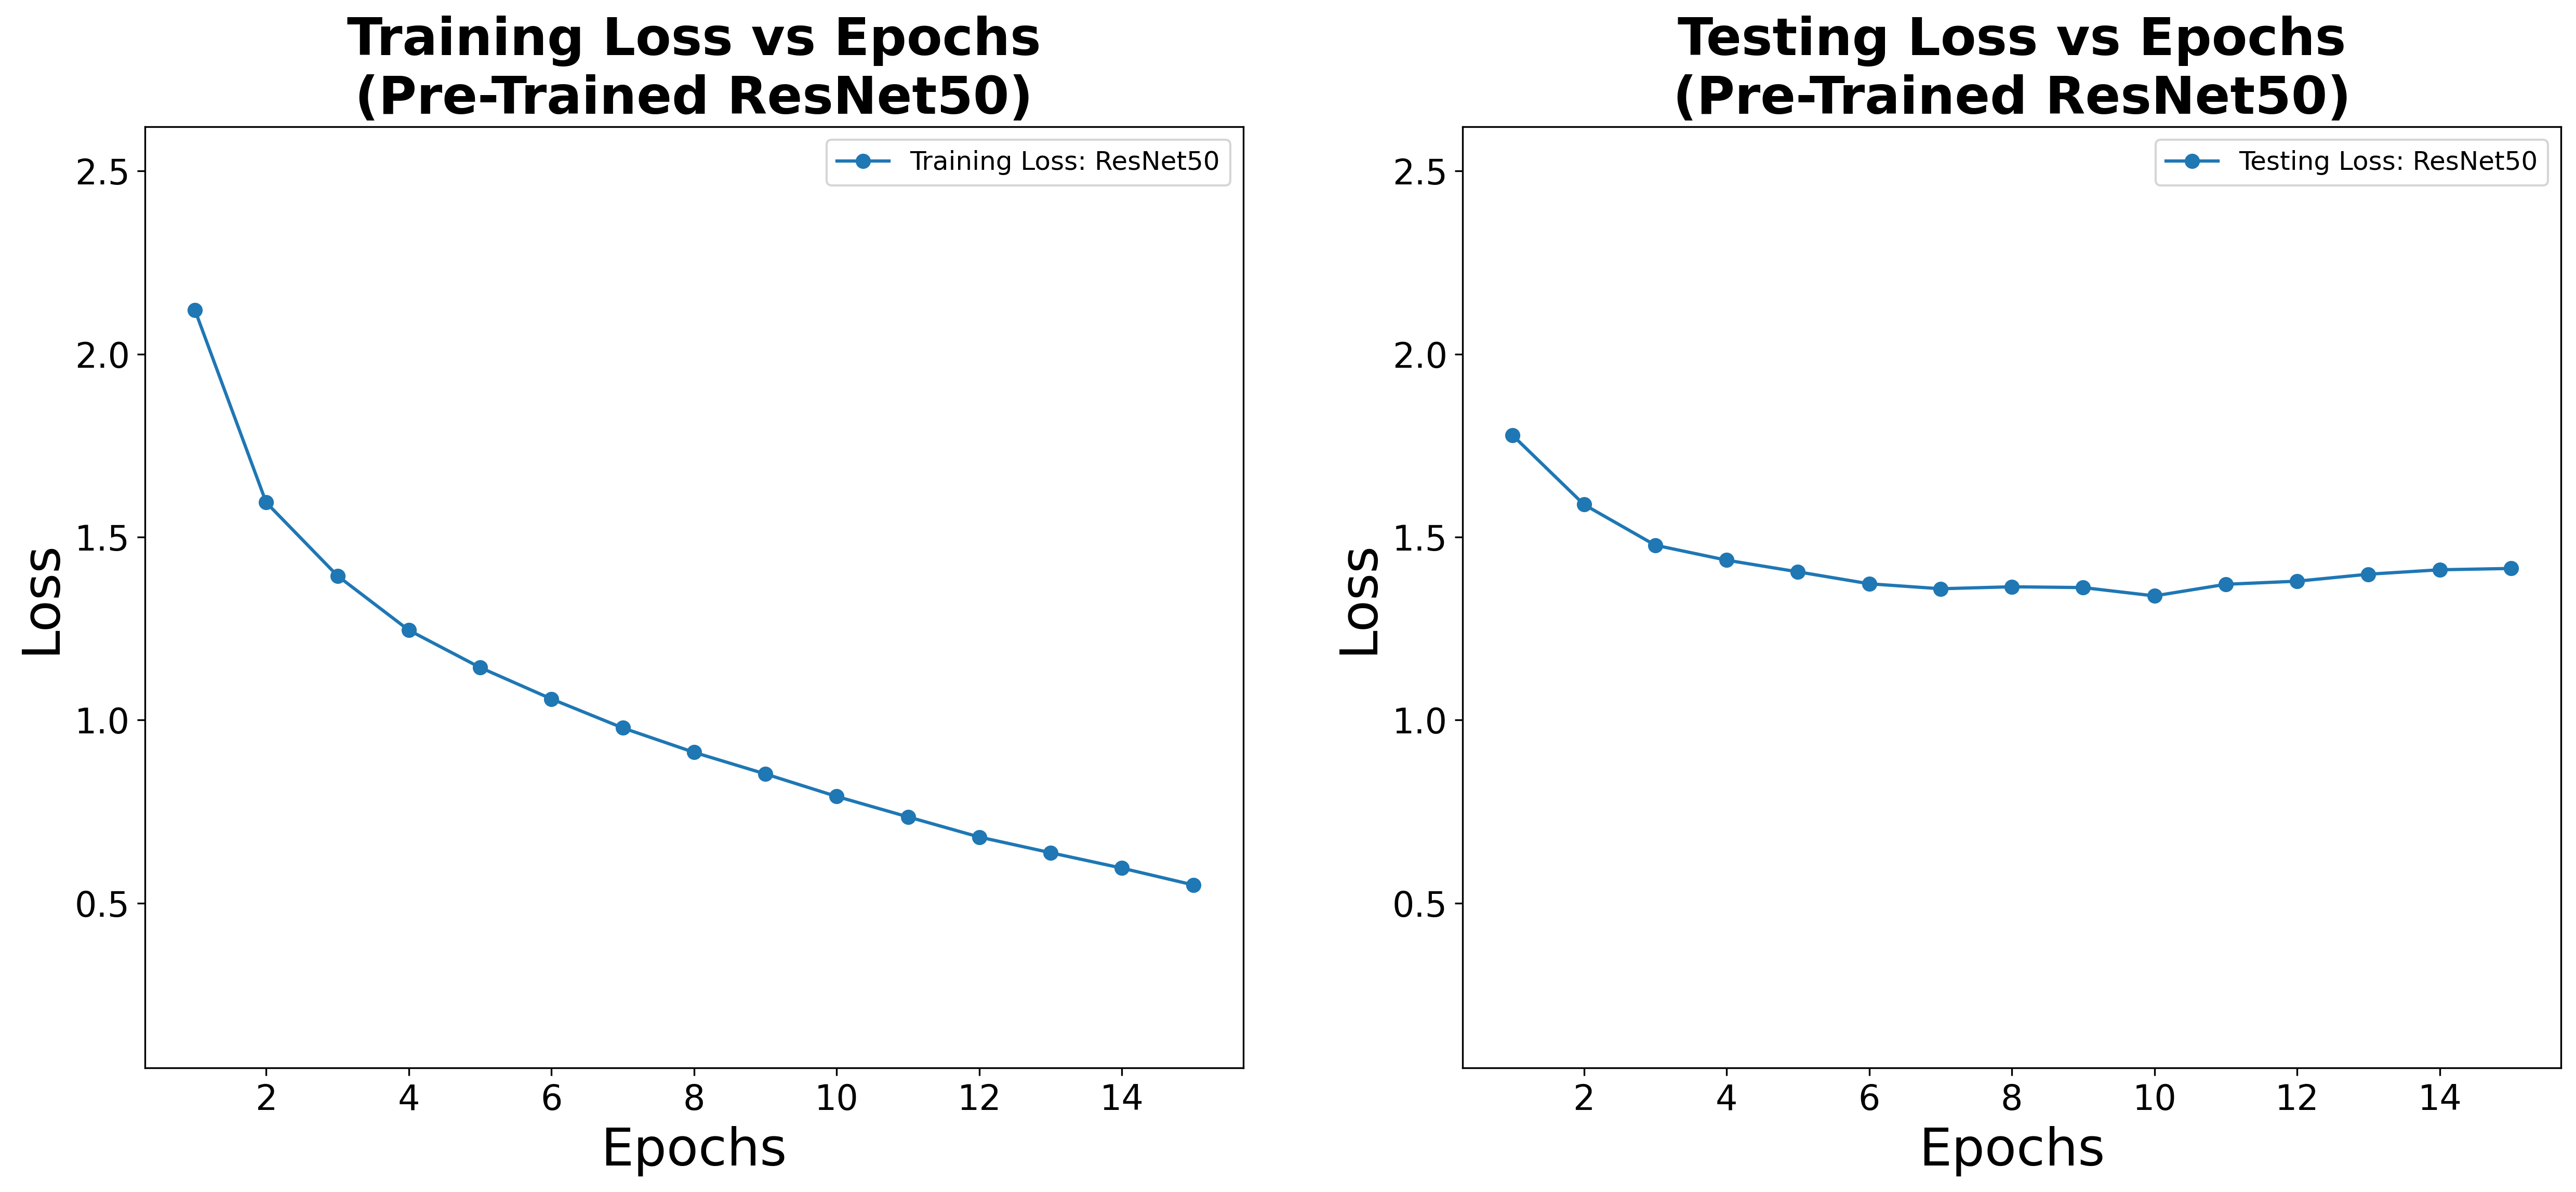

In [33]:
generate_model_train_test_loss('ResNet50')

## ResNet101 Results

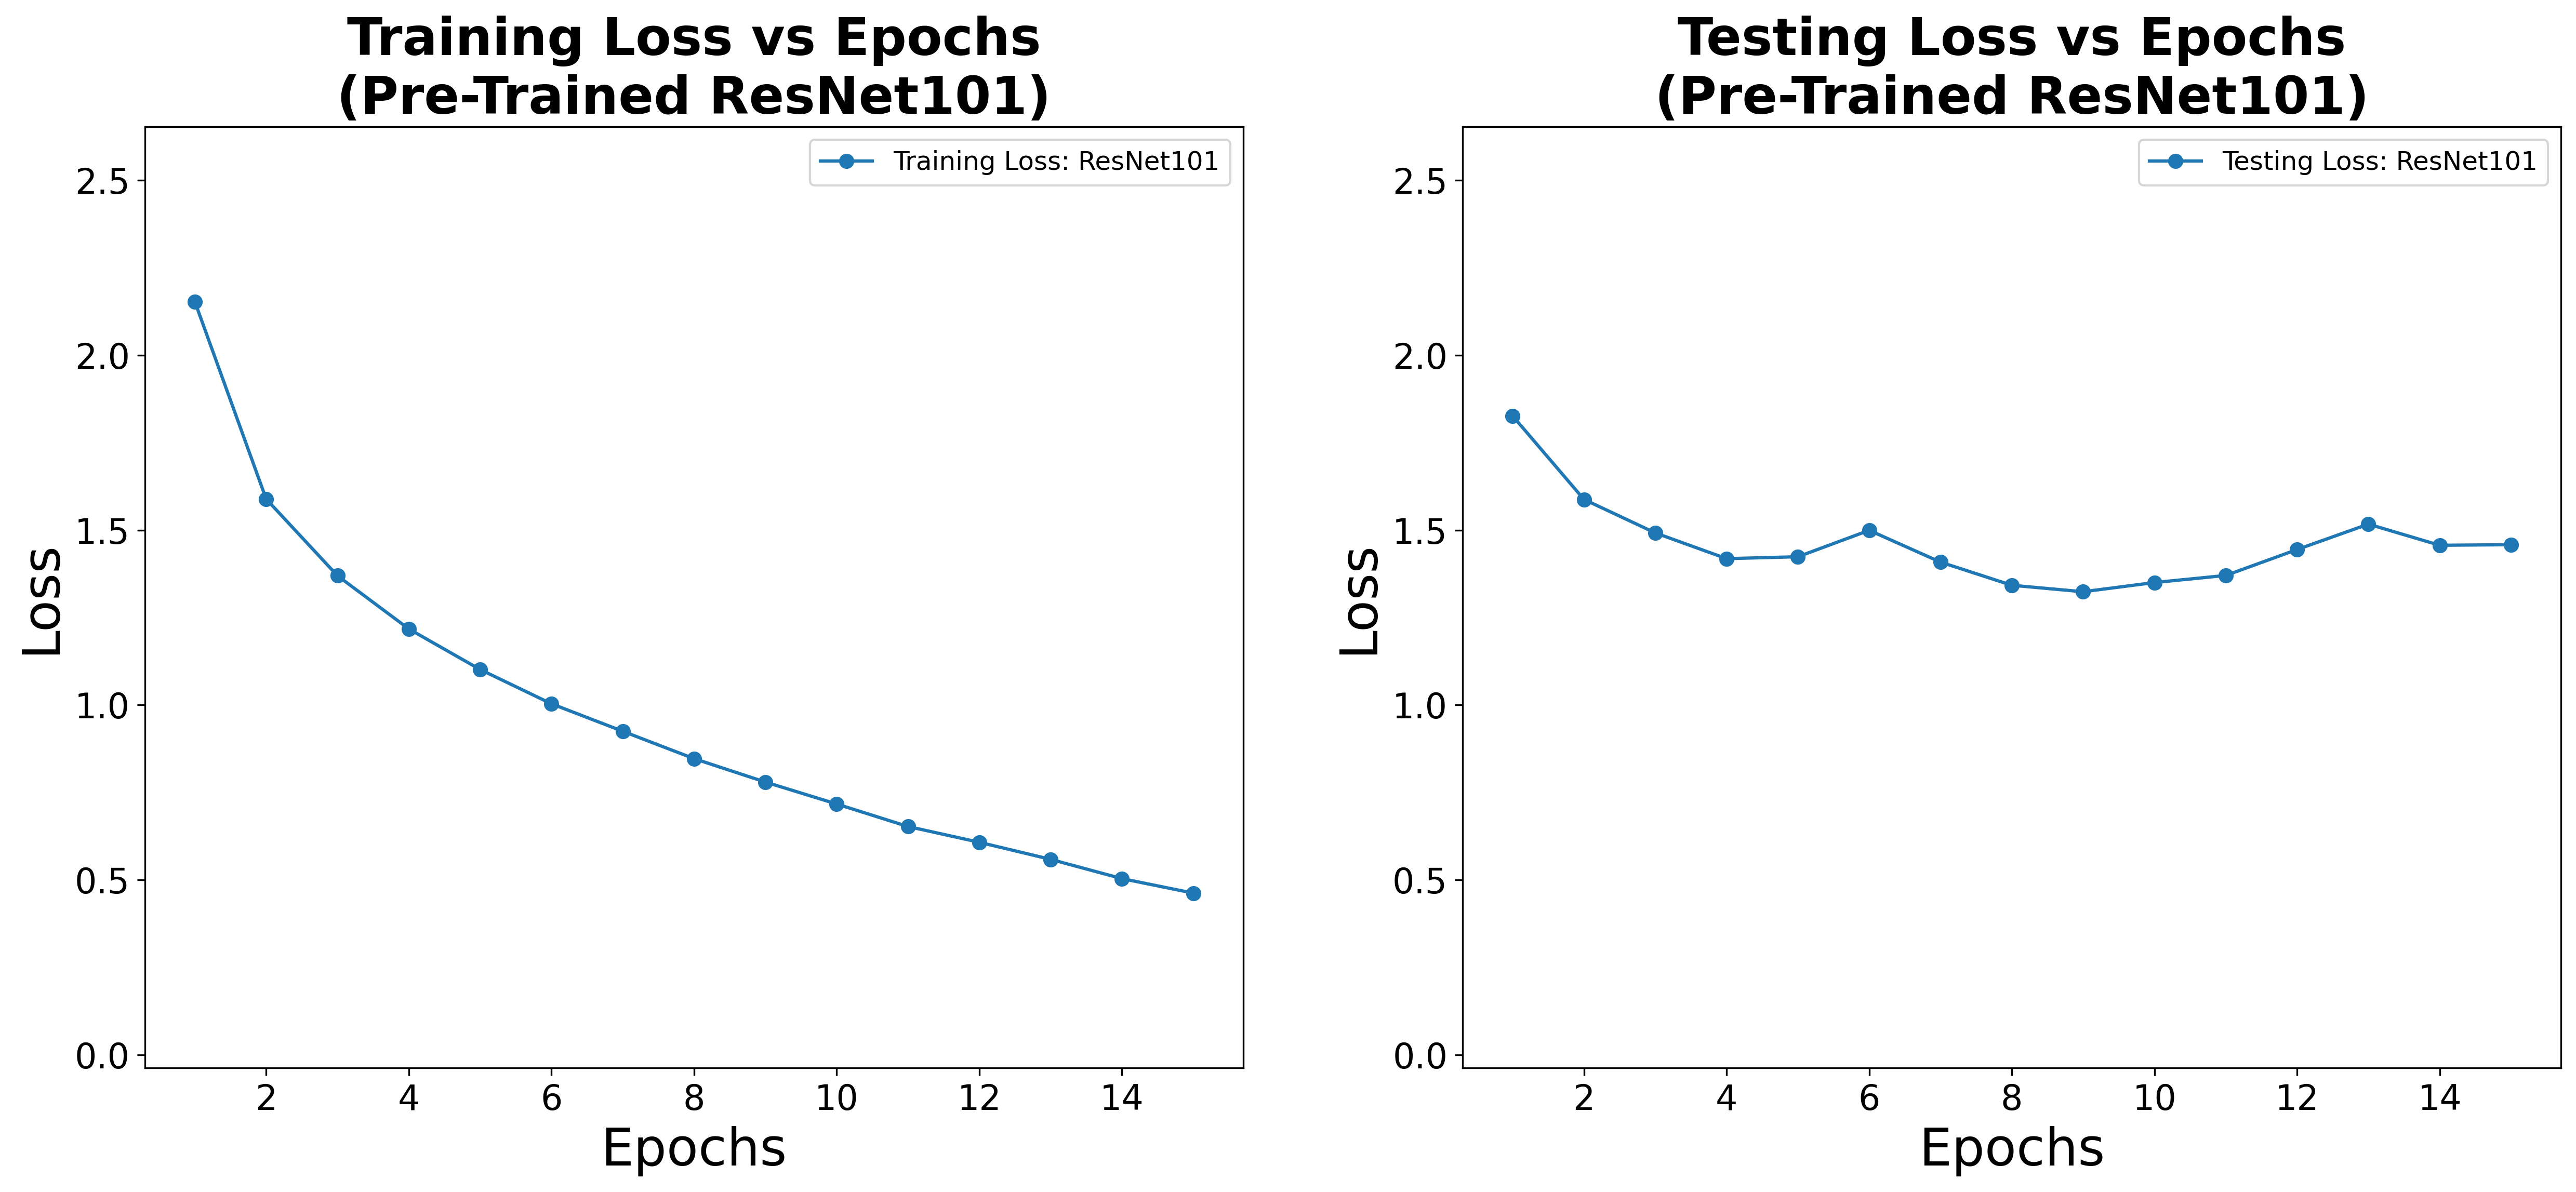

In [34]:
generate_model_train_test_loss('ResNet101')

## ResNet152 Results

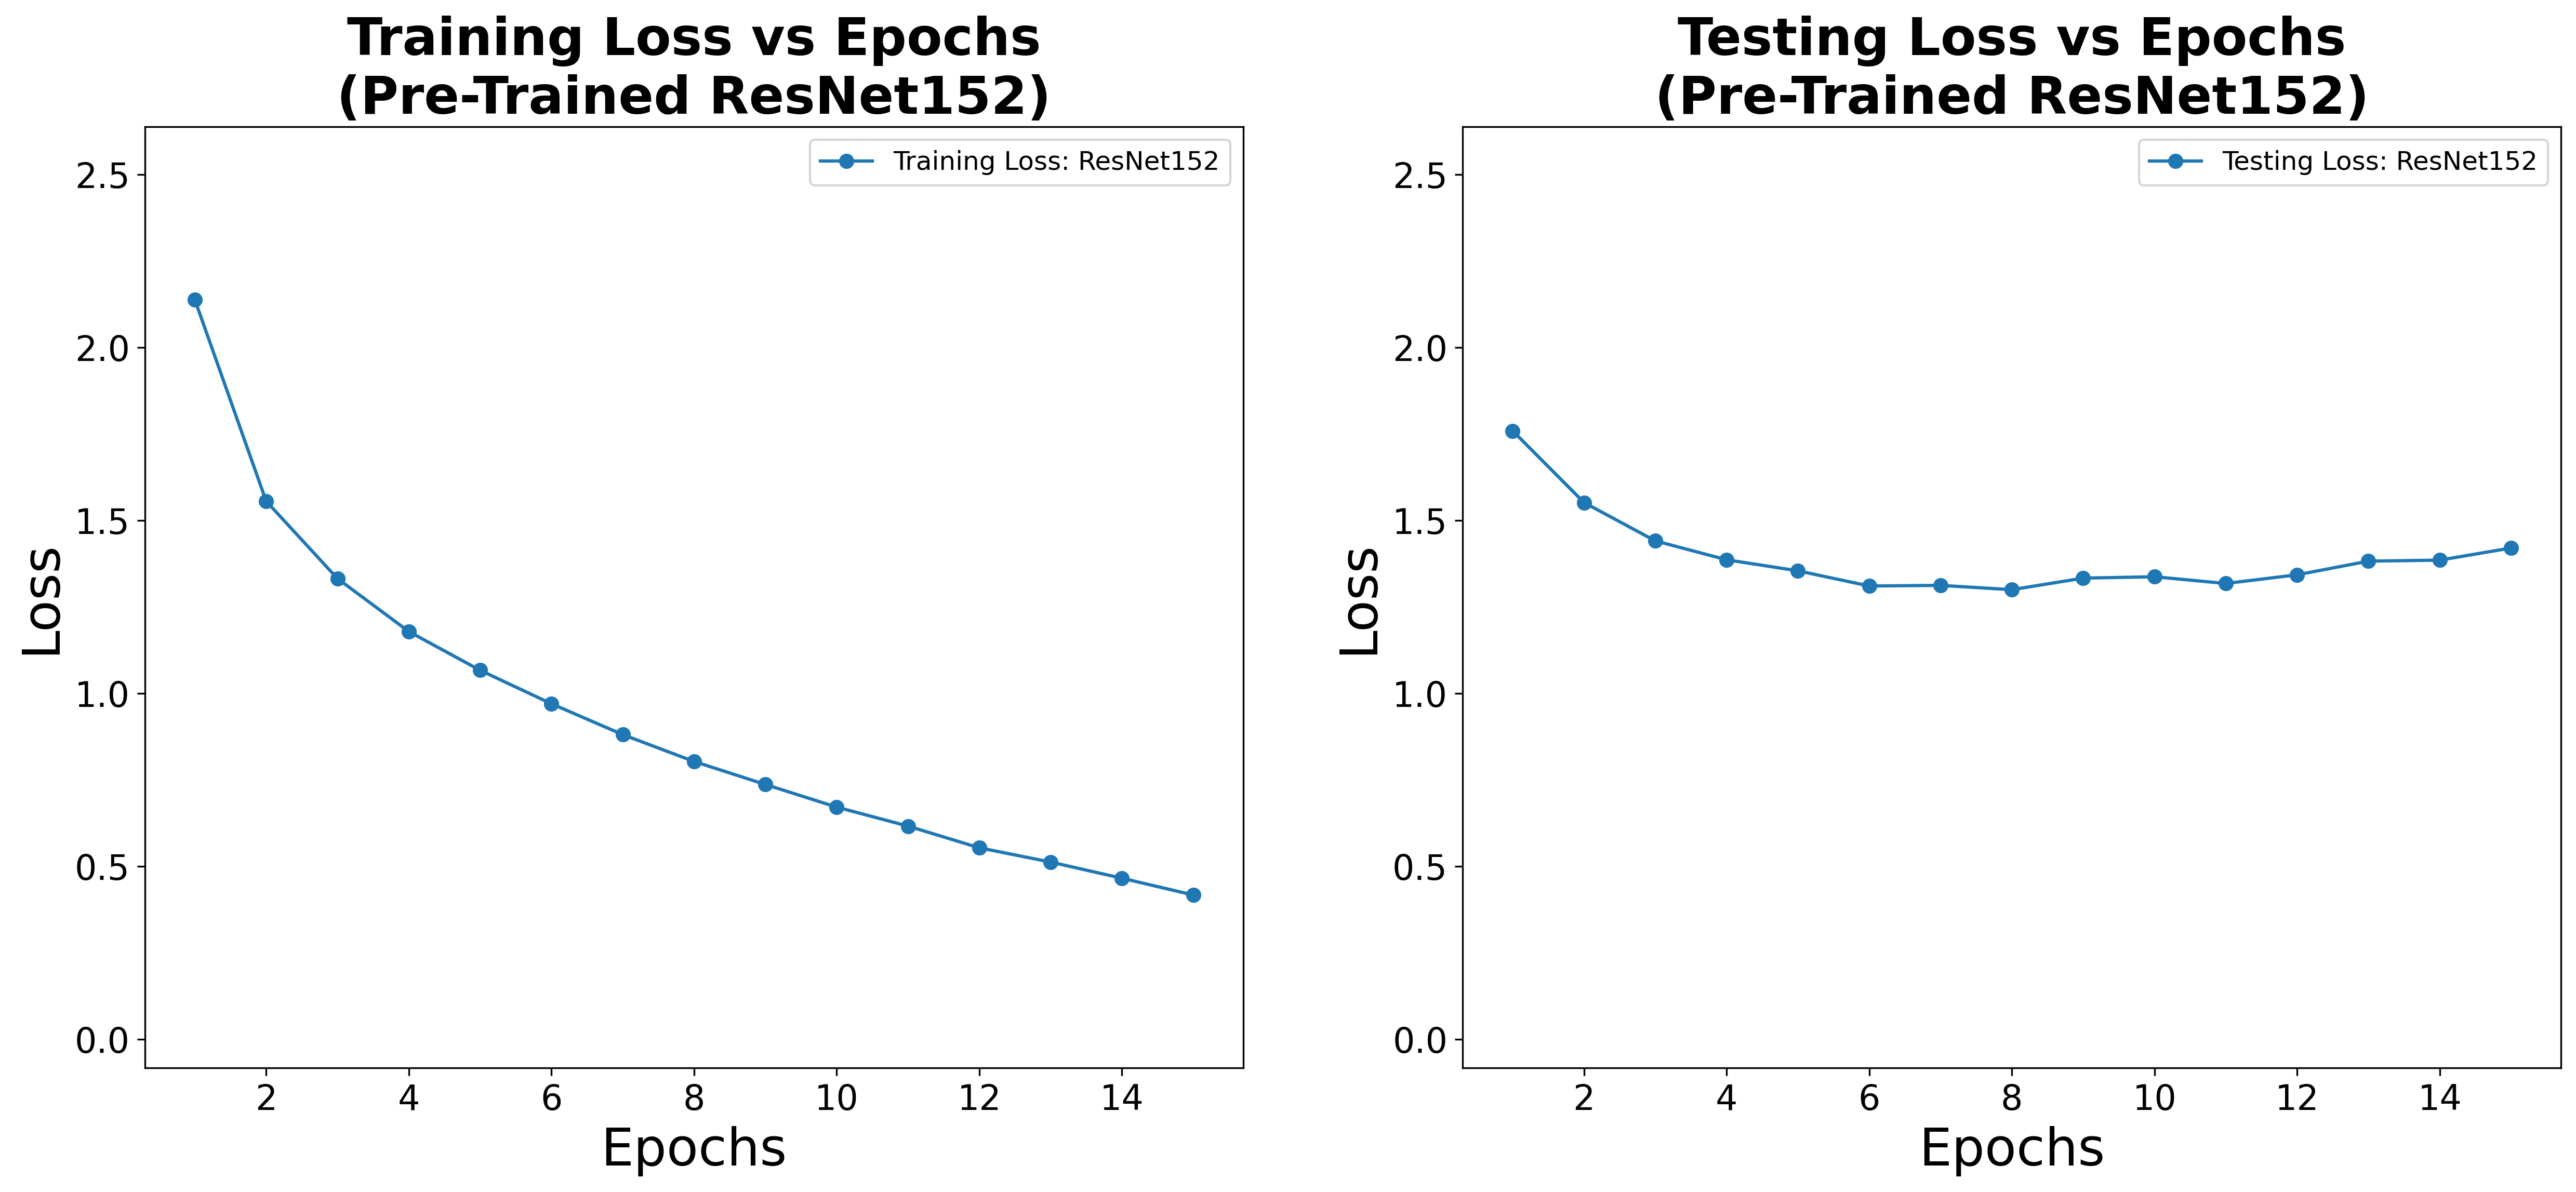

In [35]:
generate_model_train_test_loss('ResNet152')

## Plotting Grouped Barcharts by Accuracy and Model Type

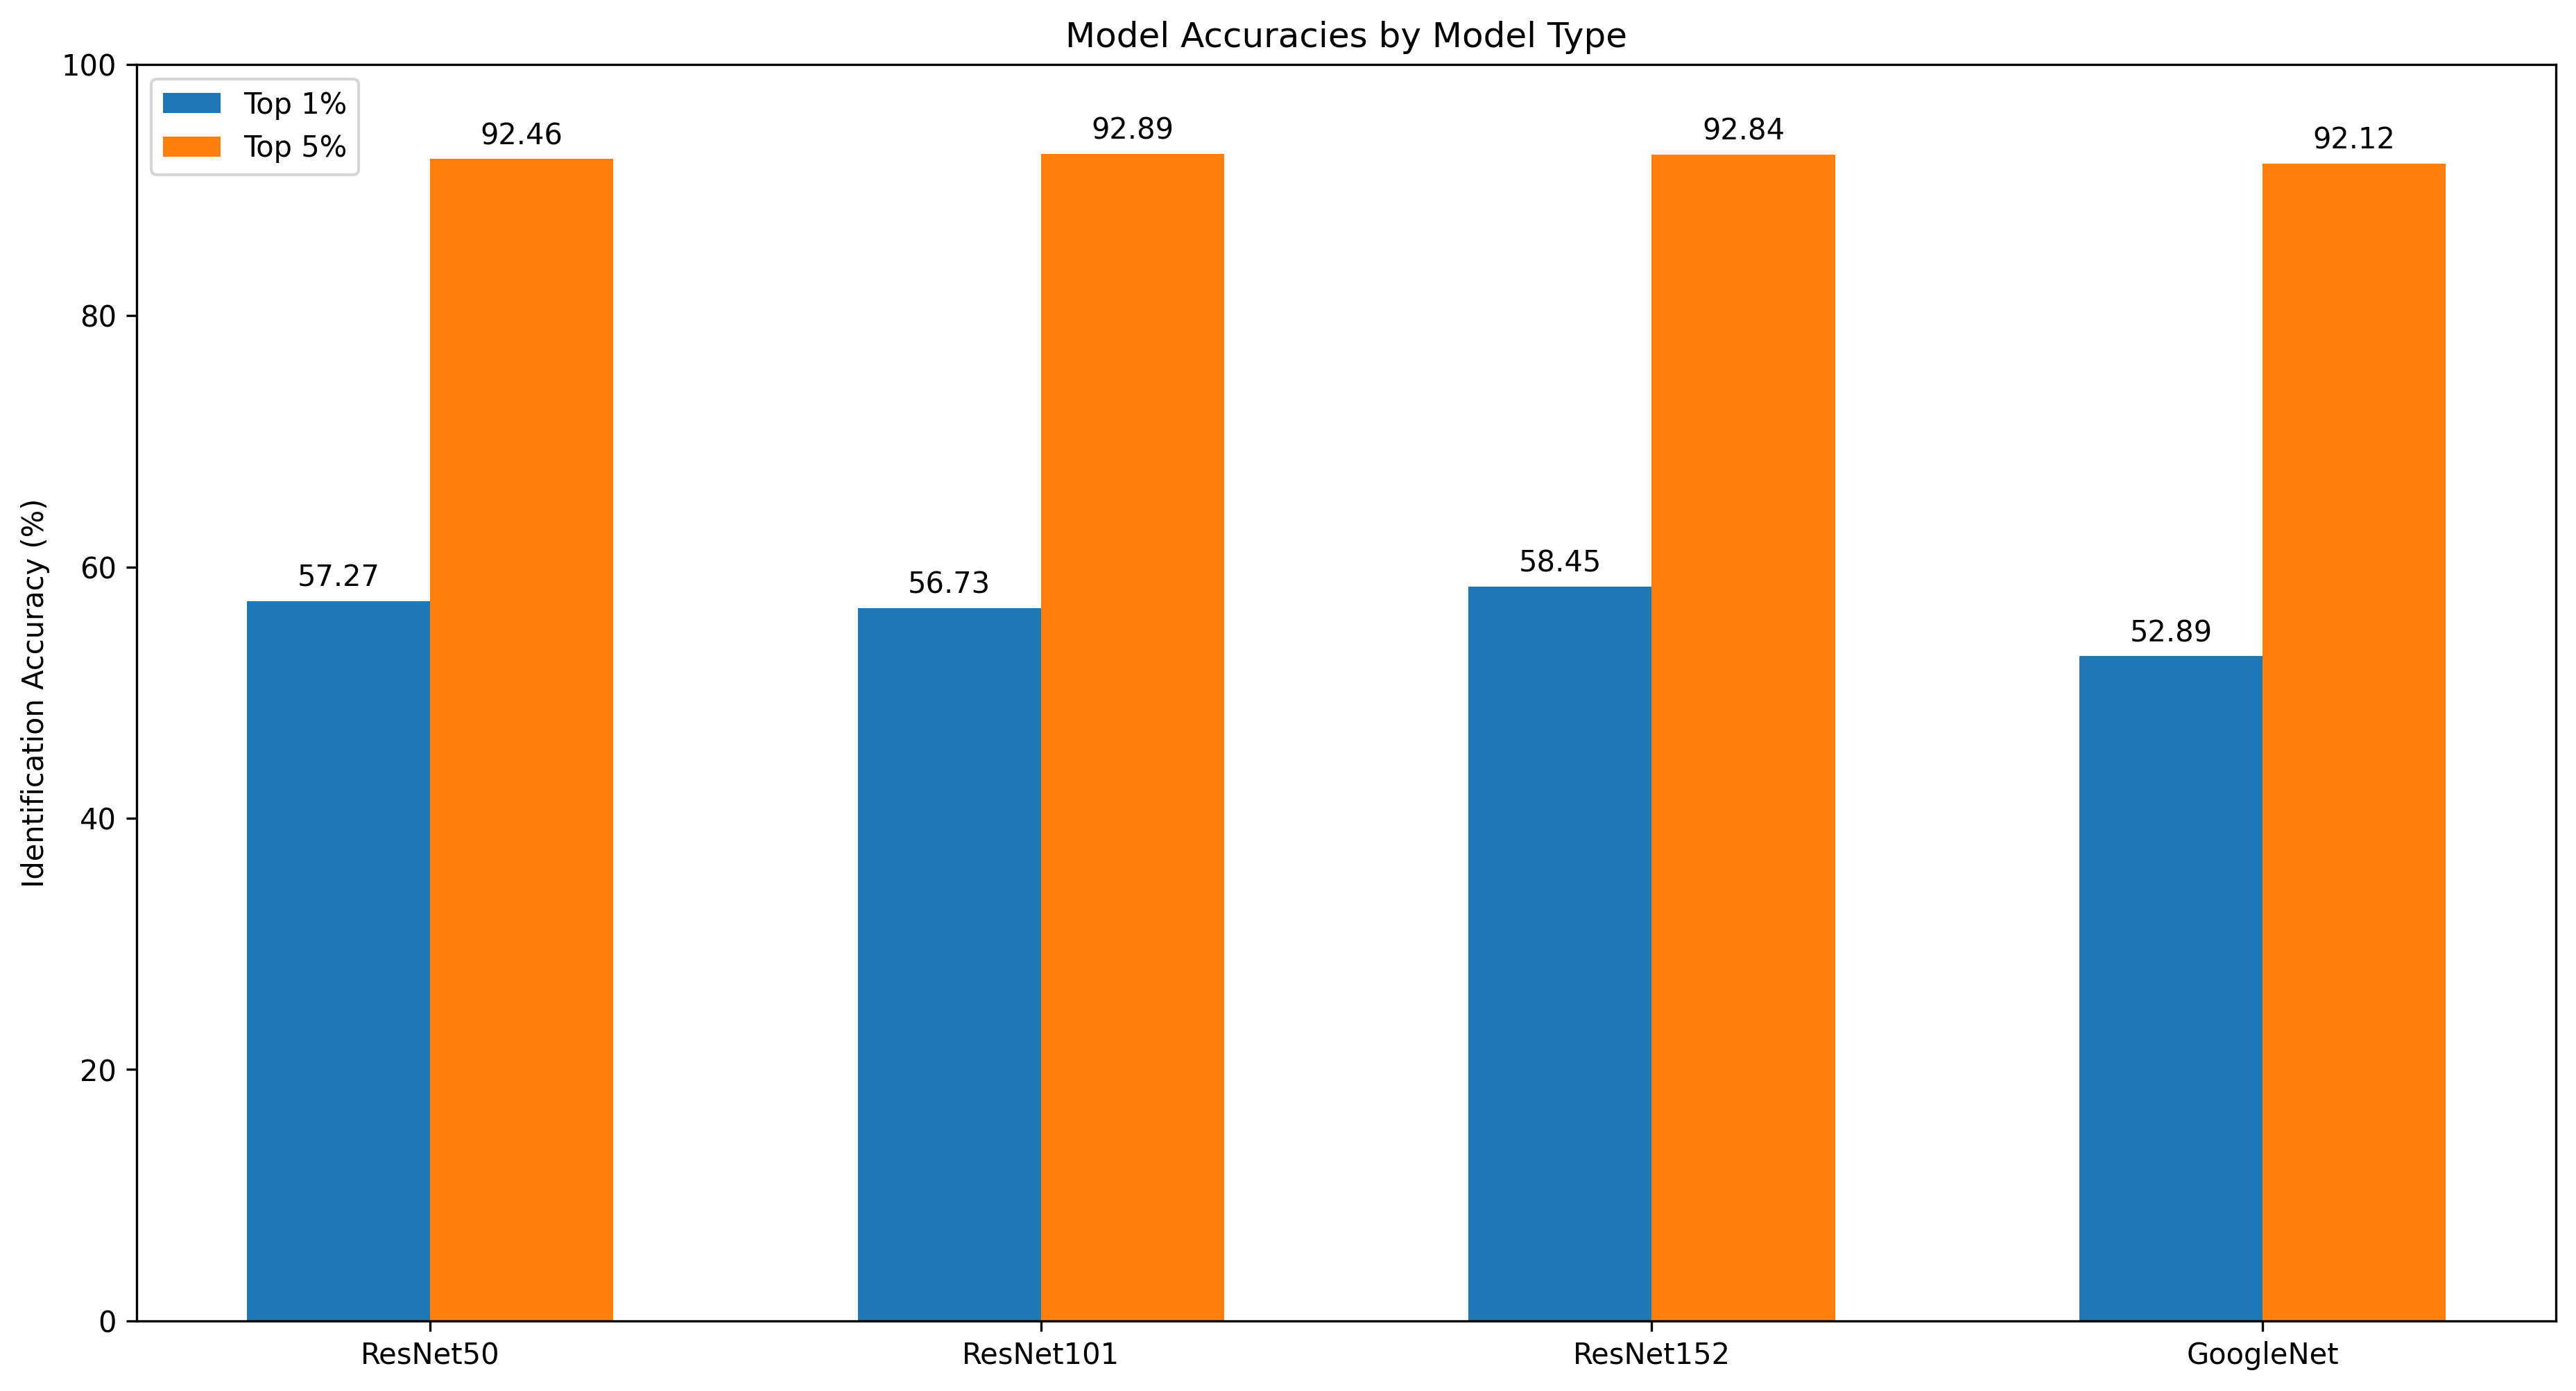

In [36]:
width = 0.3

# plotting grouped barcharts by model 
fig, ax = plt.subplots(figsize = (15,8), dpi = 300)
top1 = ax.bar(np.arange(len(classification_results_df)) - width/2, classification_results_df['Top 1%'], width, label = "Top 1%")
top5 = ax.bar(np.arange(len(classification_results_df)) + width/2, classification_results_df['Top 5%'], width, label = "Top 5%")

# adding axis attributes
ax.set_ylabel('Identification Accuracy (%)')
ax.set_title('Model Accuracies by Model Type')
ax.set_ylim([0, 100])
ax.set_xticks(np.arange(len(classification_results_df)))
ax.set_xticklabels(classification_results_df['Model Name'].str.replace('PretrainedCustom', '').str.replace('_Last2Layers', ''))

# adding labels on top of bars
ax.bar_label(top1, padding=3, fmt='%.2f')
ax.bar_label(top5, padding=3, fmt='%.2f')
ax.legend()

plt.savefig("output/Pretrained Model Accuracies (50% of the data).jpg", dpi = 300, bbox_inches = 'tight')
plt.savefig("output/Pretrained Model Accuracies (50% of the data).pdf", dpi = 300, bbox_inches = 'tight')
plt.show()

# Show Specific Model Results

In [37]:
def generate_model_accuracies(model_name):
    filtered_classification_results_df = classification_results_df[classification_results_df['Model Name'].str.contains(model_name)]
    width = 0.3

    # plotting grouped barcharts by model 
    fig, ax = plt.subplots(figsize = (15,8), dpi = 300)
    top1 = ax.bar(np.arange(len(filtered_classification_results_df)) - width/2, filtered_classification_results_df['Top 1%'], width, label = "Top 1%")
    top5 = ax.bar(np.arange(len(filtered_classification_results_df)) + width/2, filtered_classification_results_df['Top 5%'], width, label = "Top 5%")

    # adding axis attributes
    ax.set_ylabel('Identification Accuracy')
    ax.set_title(f'Model Accuracies for {model_name}')
    ax.set_ylim([0, 100])
    ax.set_xticks(np.arange(len(filtered_classification_results_df)))
    ax.set_xticklabels(filtered_classification_results_df['Model Name'].str.replace('PretrainedCustom', '').str.replace('_Last2Layers', ''))

    # adding labels on top of bars
    ax.bar_label(top1, padding=3, fmt='%.2f')
    ax.bar_label(top5, padding=3, fmt='%.2f')
    ax.legend()

    plt.savefig(f"output/Pretrained Model Accuracies_{model_name} (50% of the data).jpg", dpi = 300, bbox_inches = 'tight')
    plt.savefig(f"output/Pretrained Model Accuracies_{model_name} (50% of the data)", dpi = 300, bbox_inches = 'tight')
    plt.show()

## GoogLeNet Results

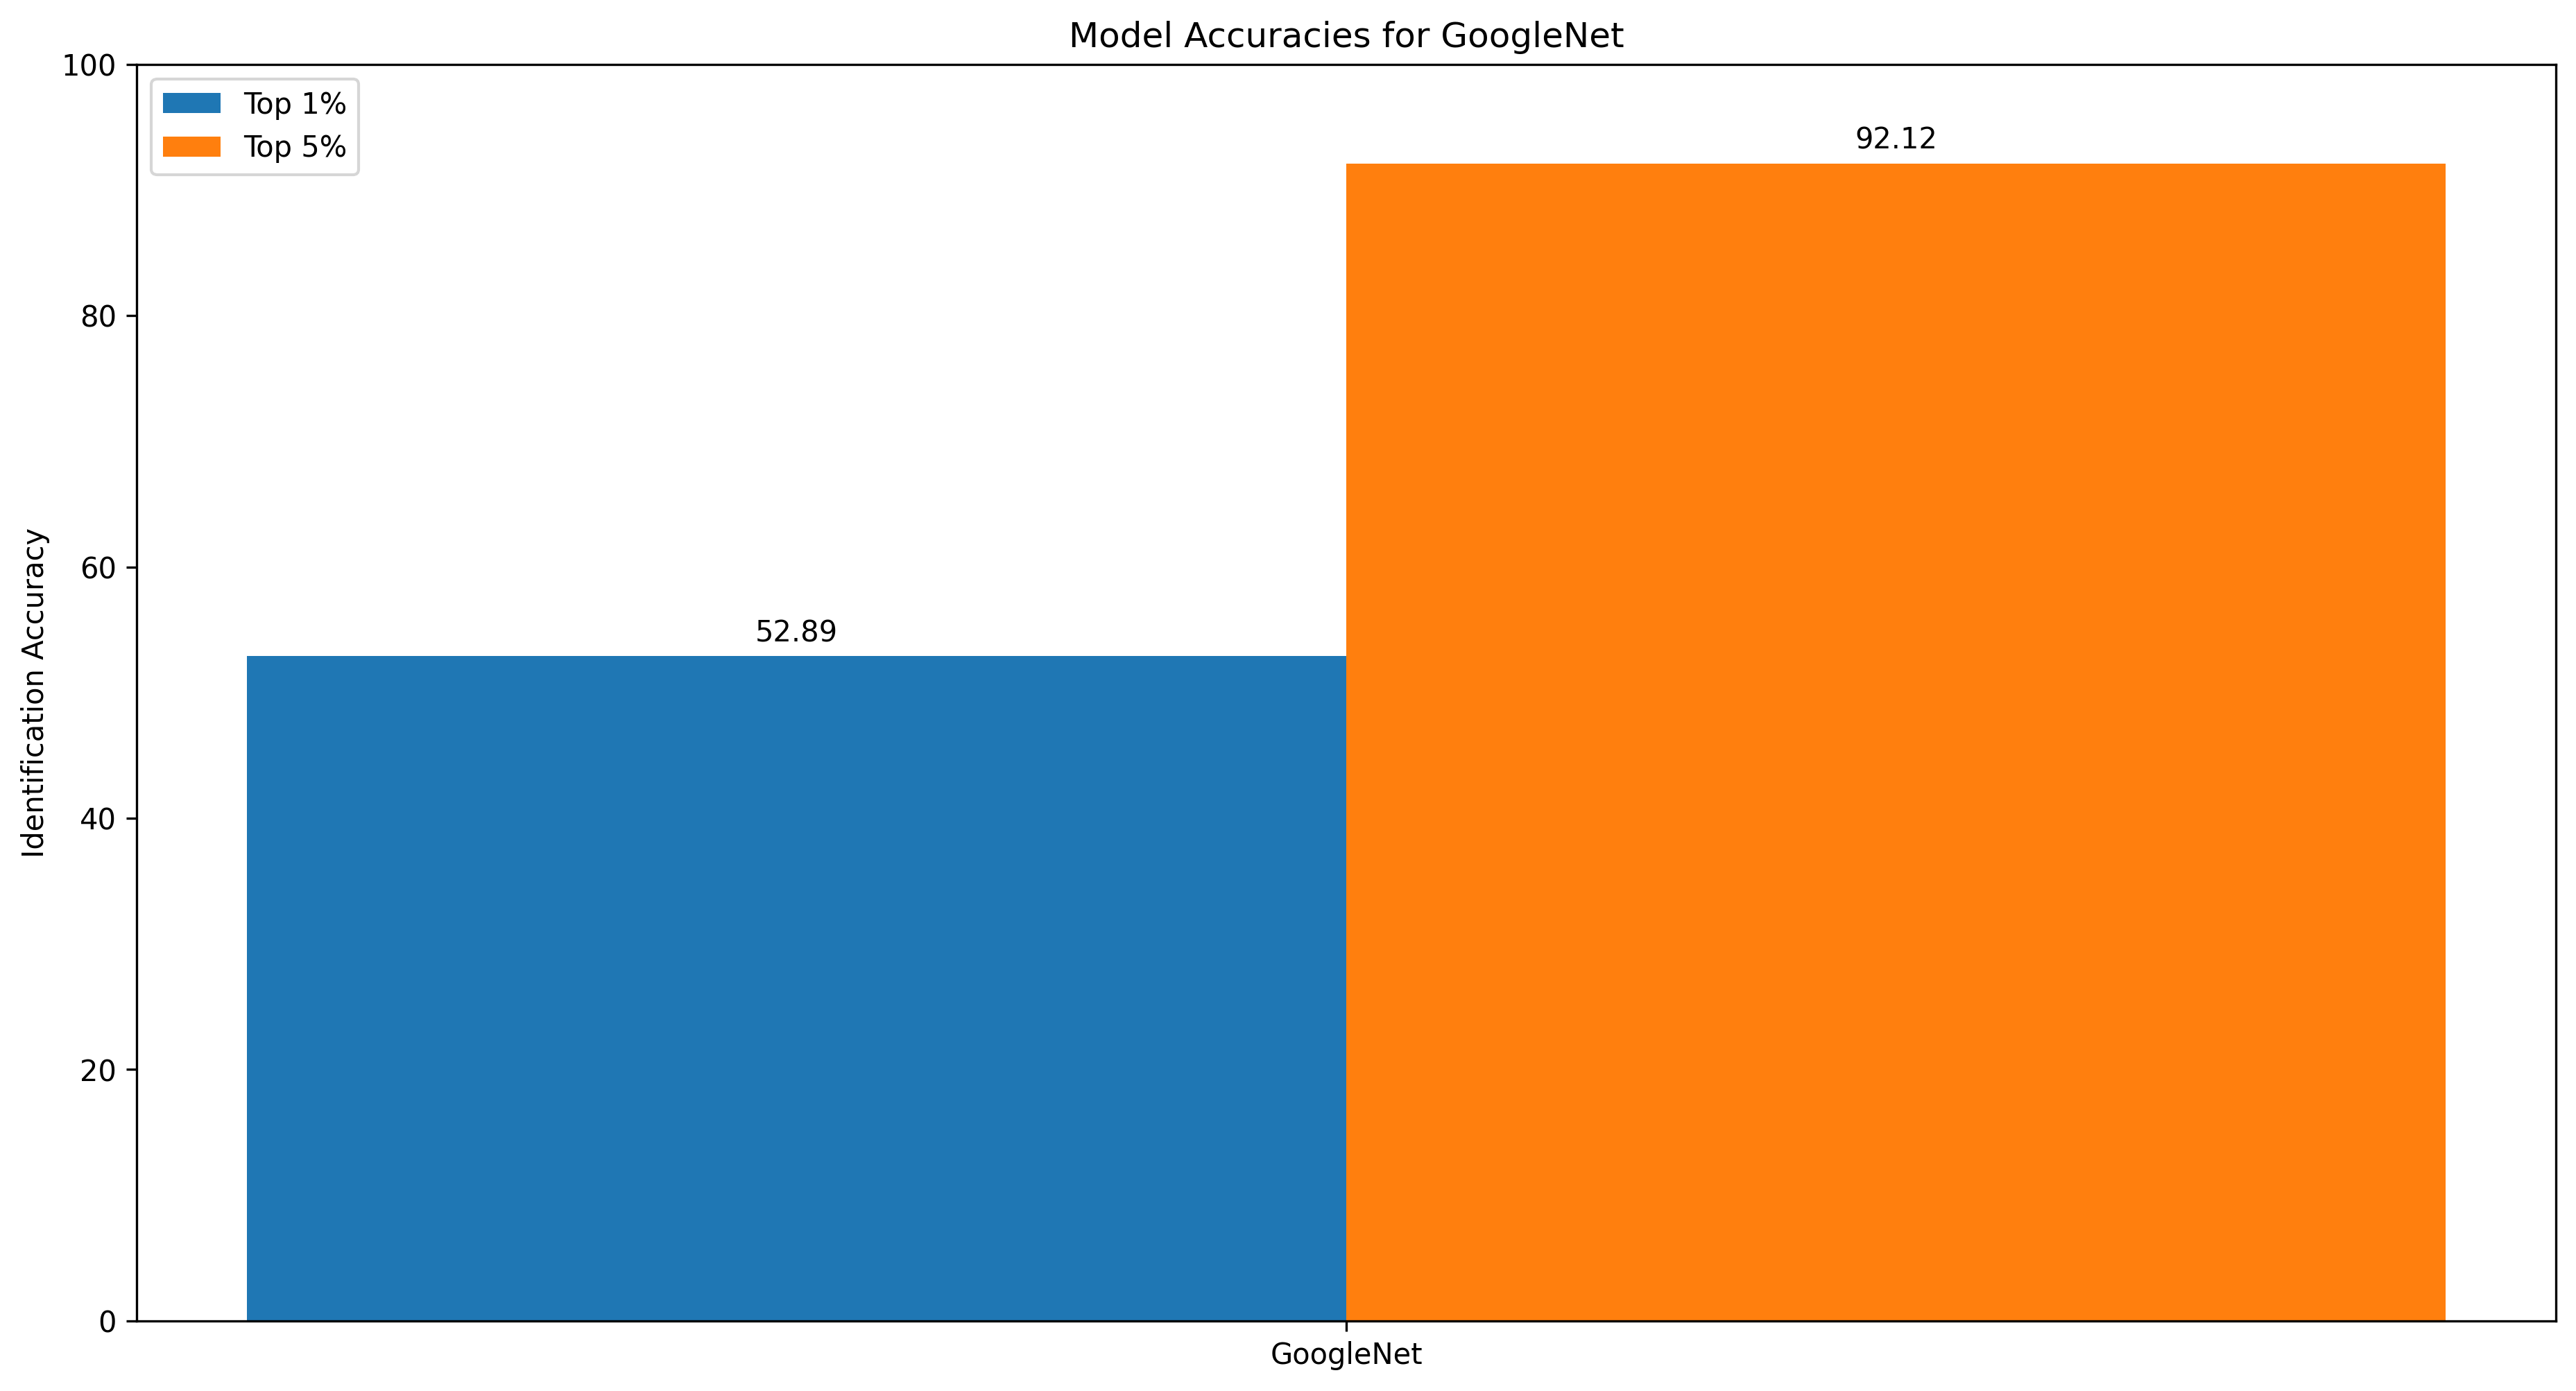

In [38]:
generate_model_accuracies('GoogleNet')

## ResNet50 Results

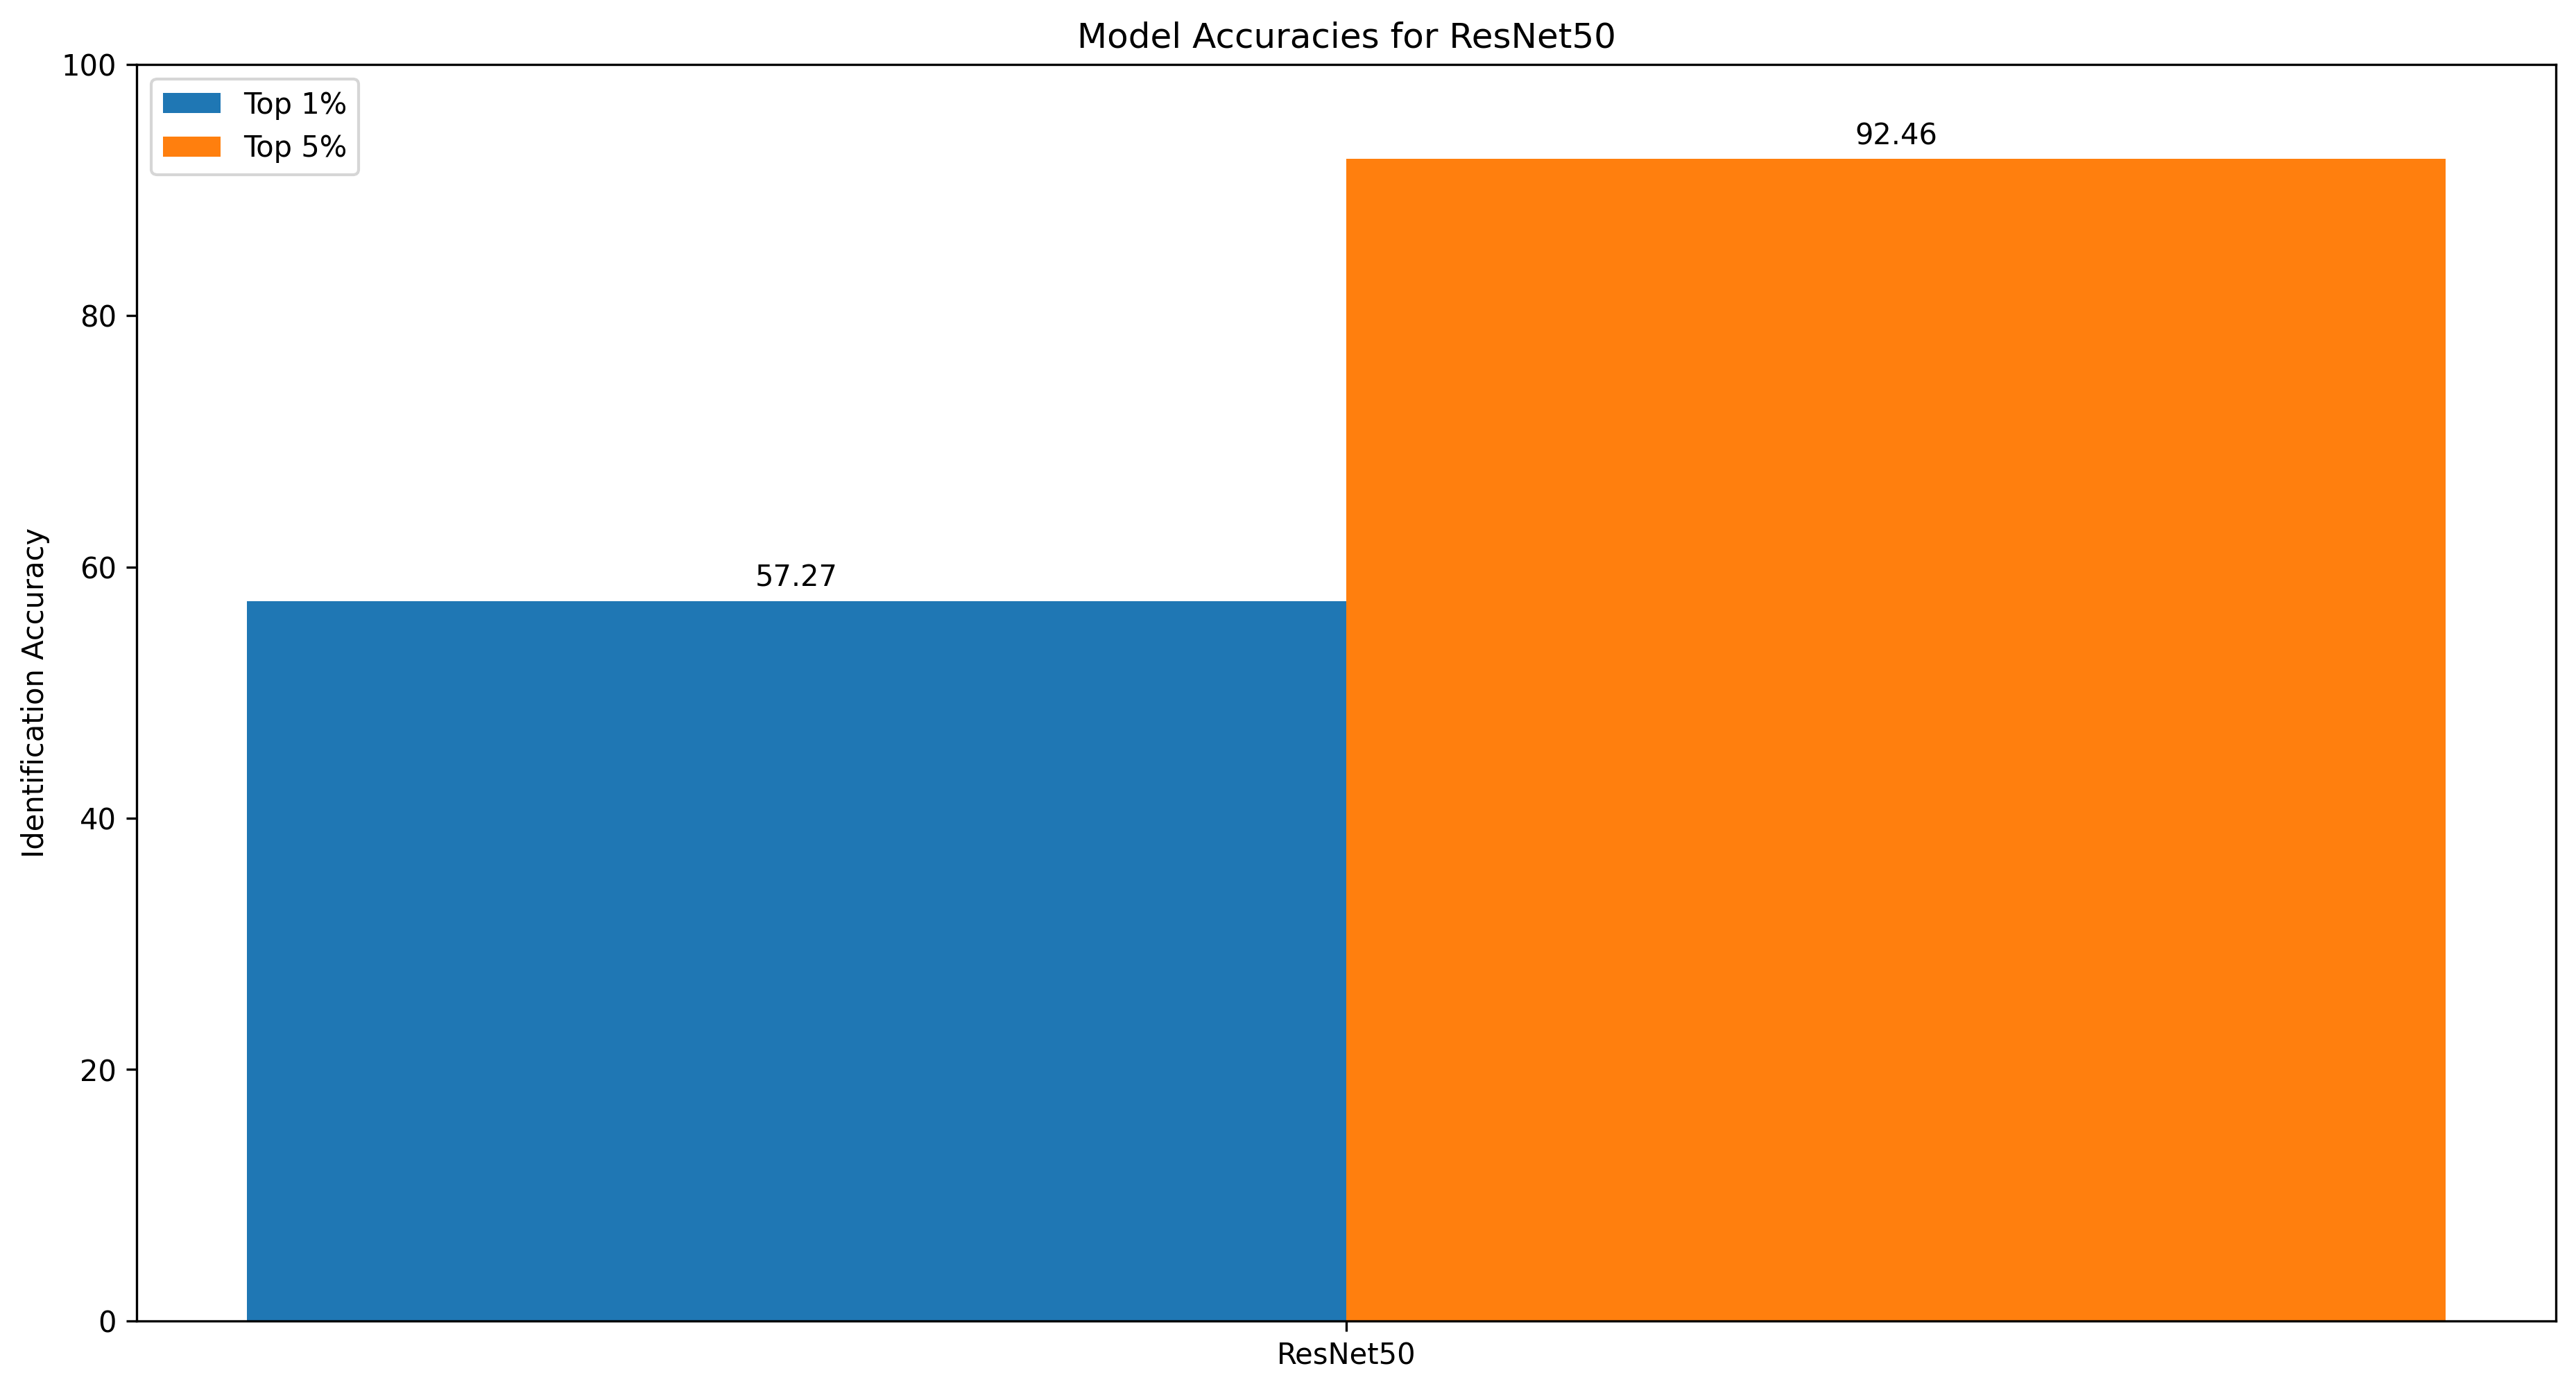

In [39]:
generate_model_accuracies('ResNet50')

## ResNet101 Results

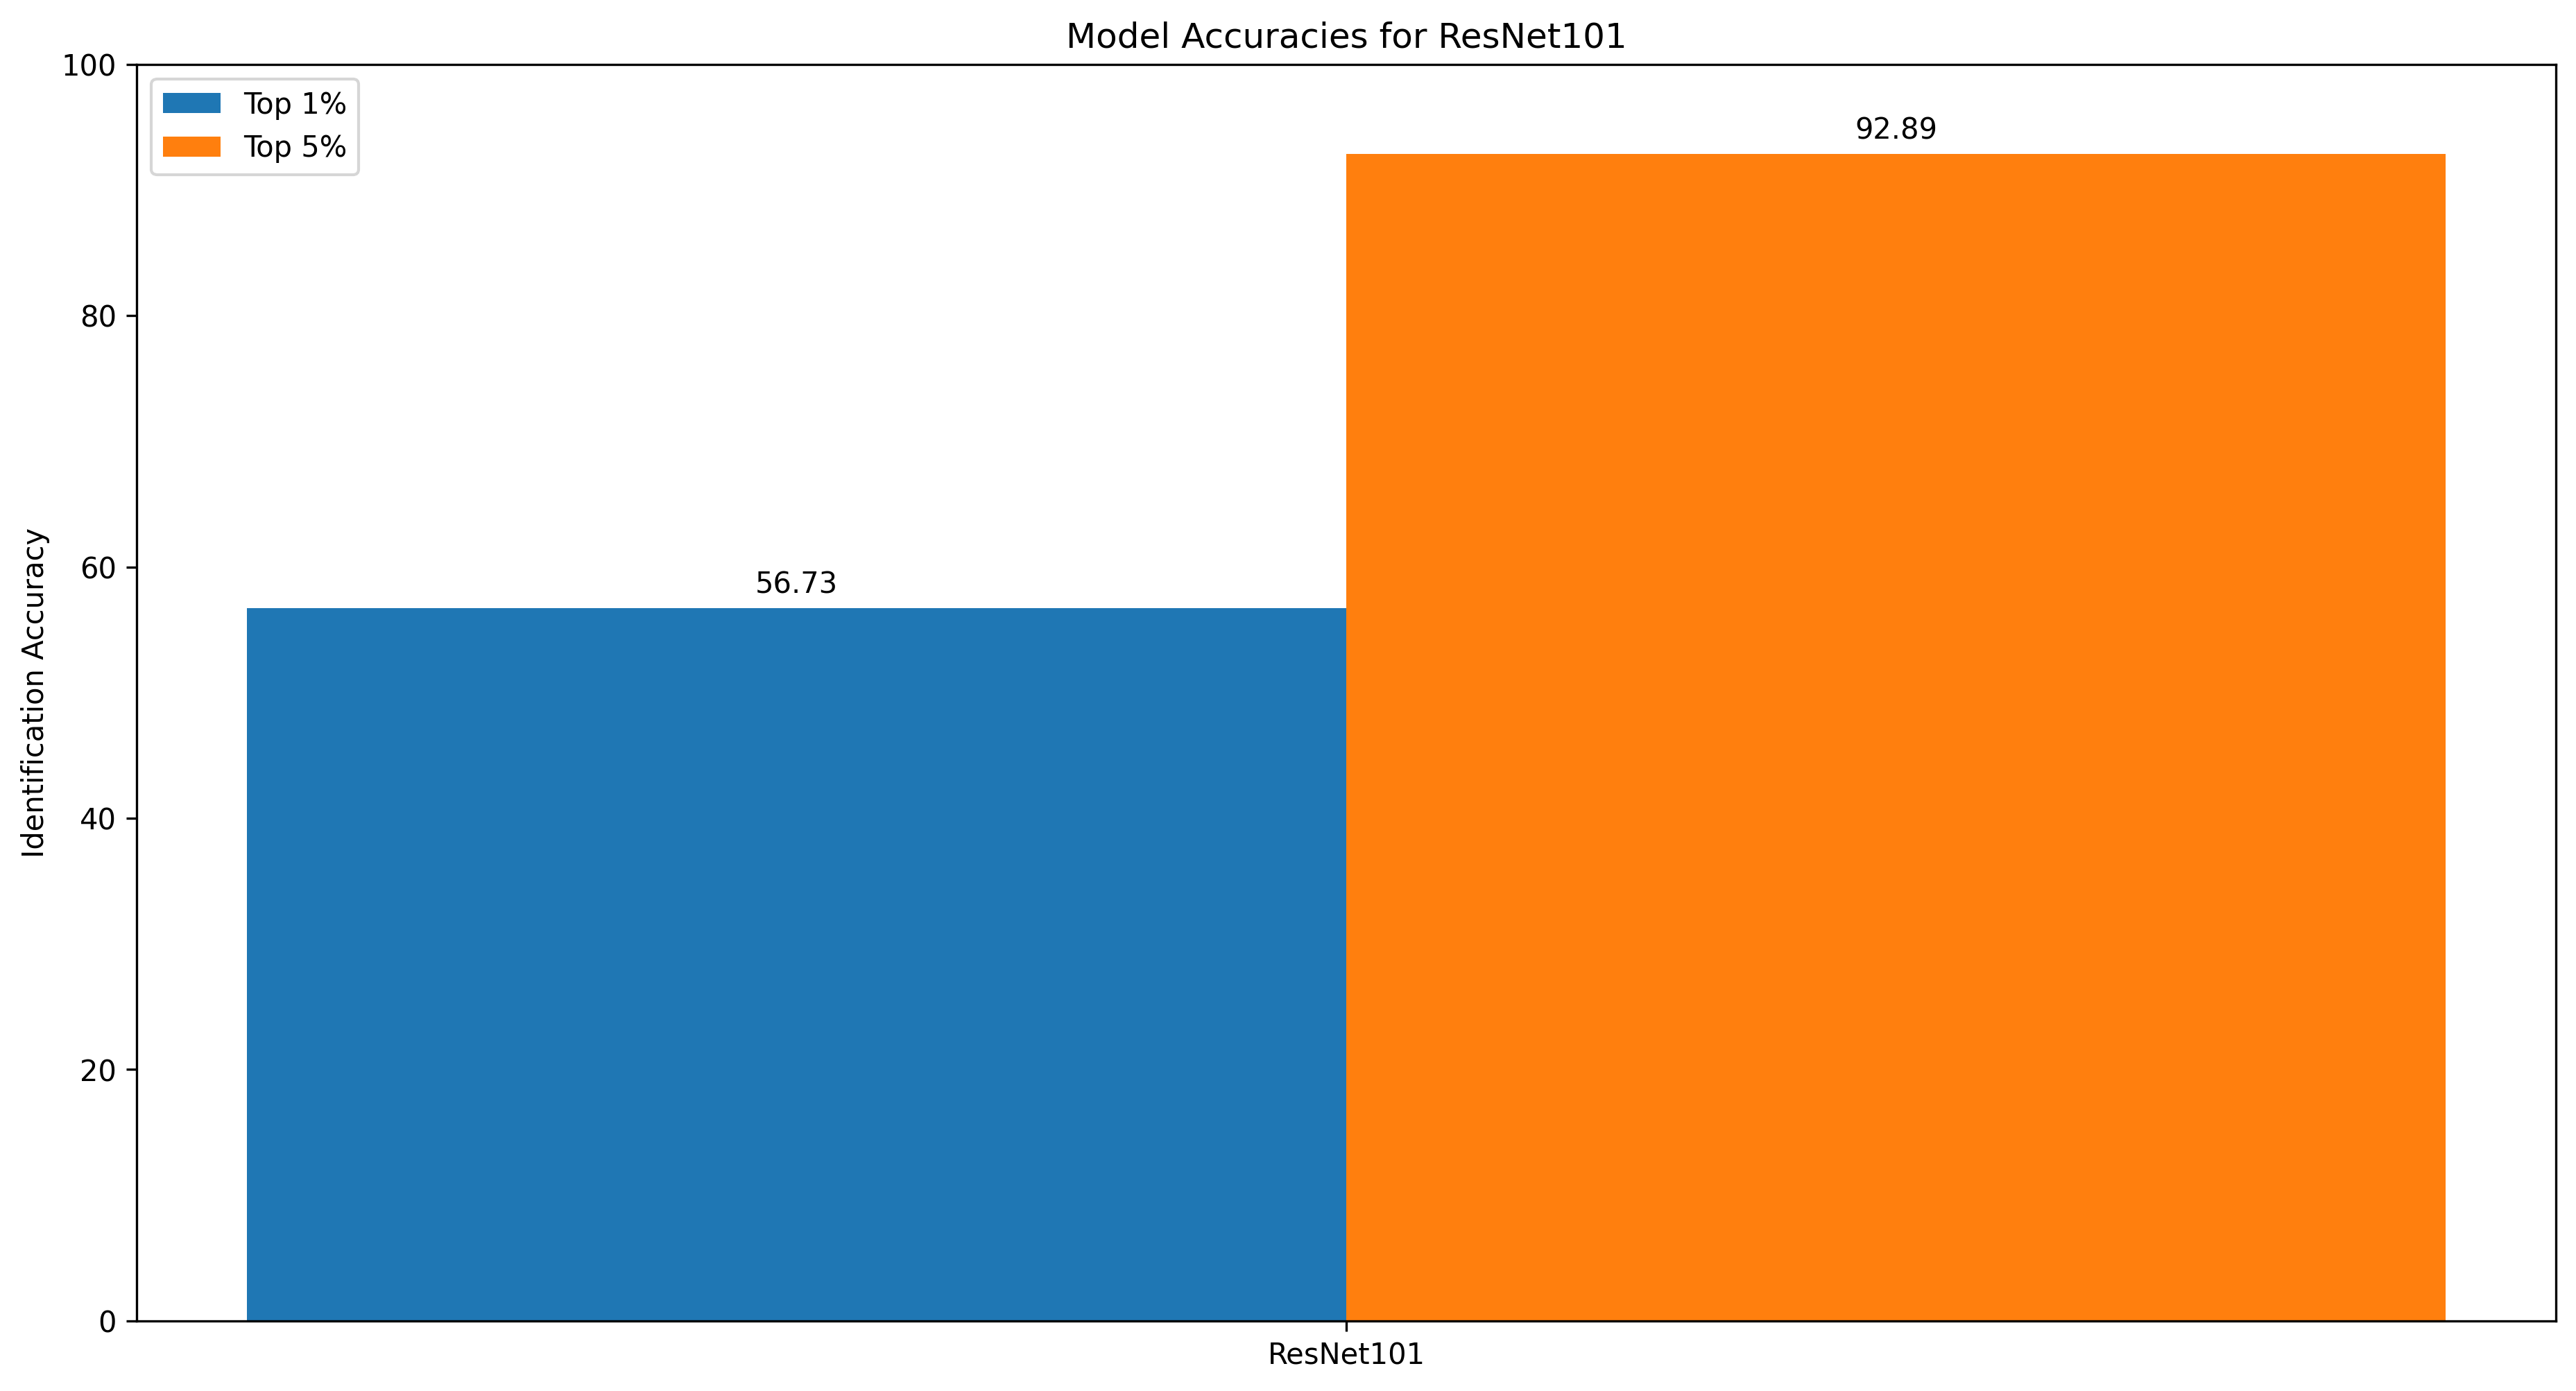

In [40]:
generate_model_accuracies('ResNet101')

## ResNet152 Results

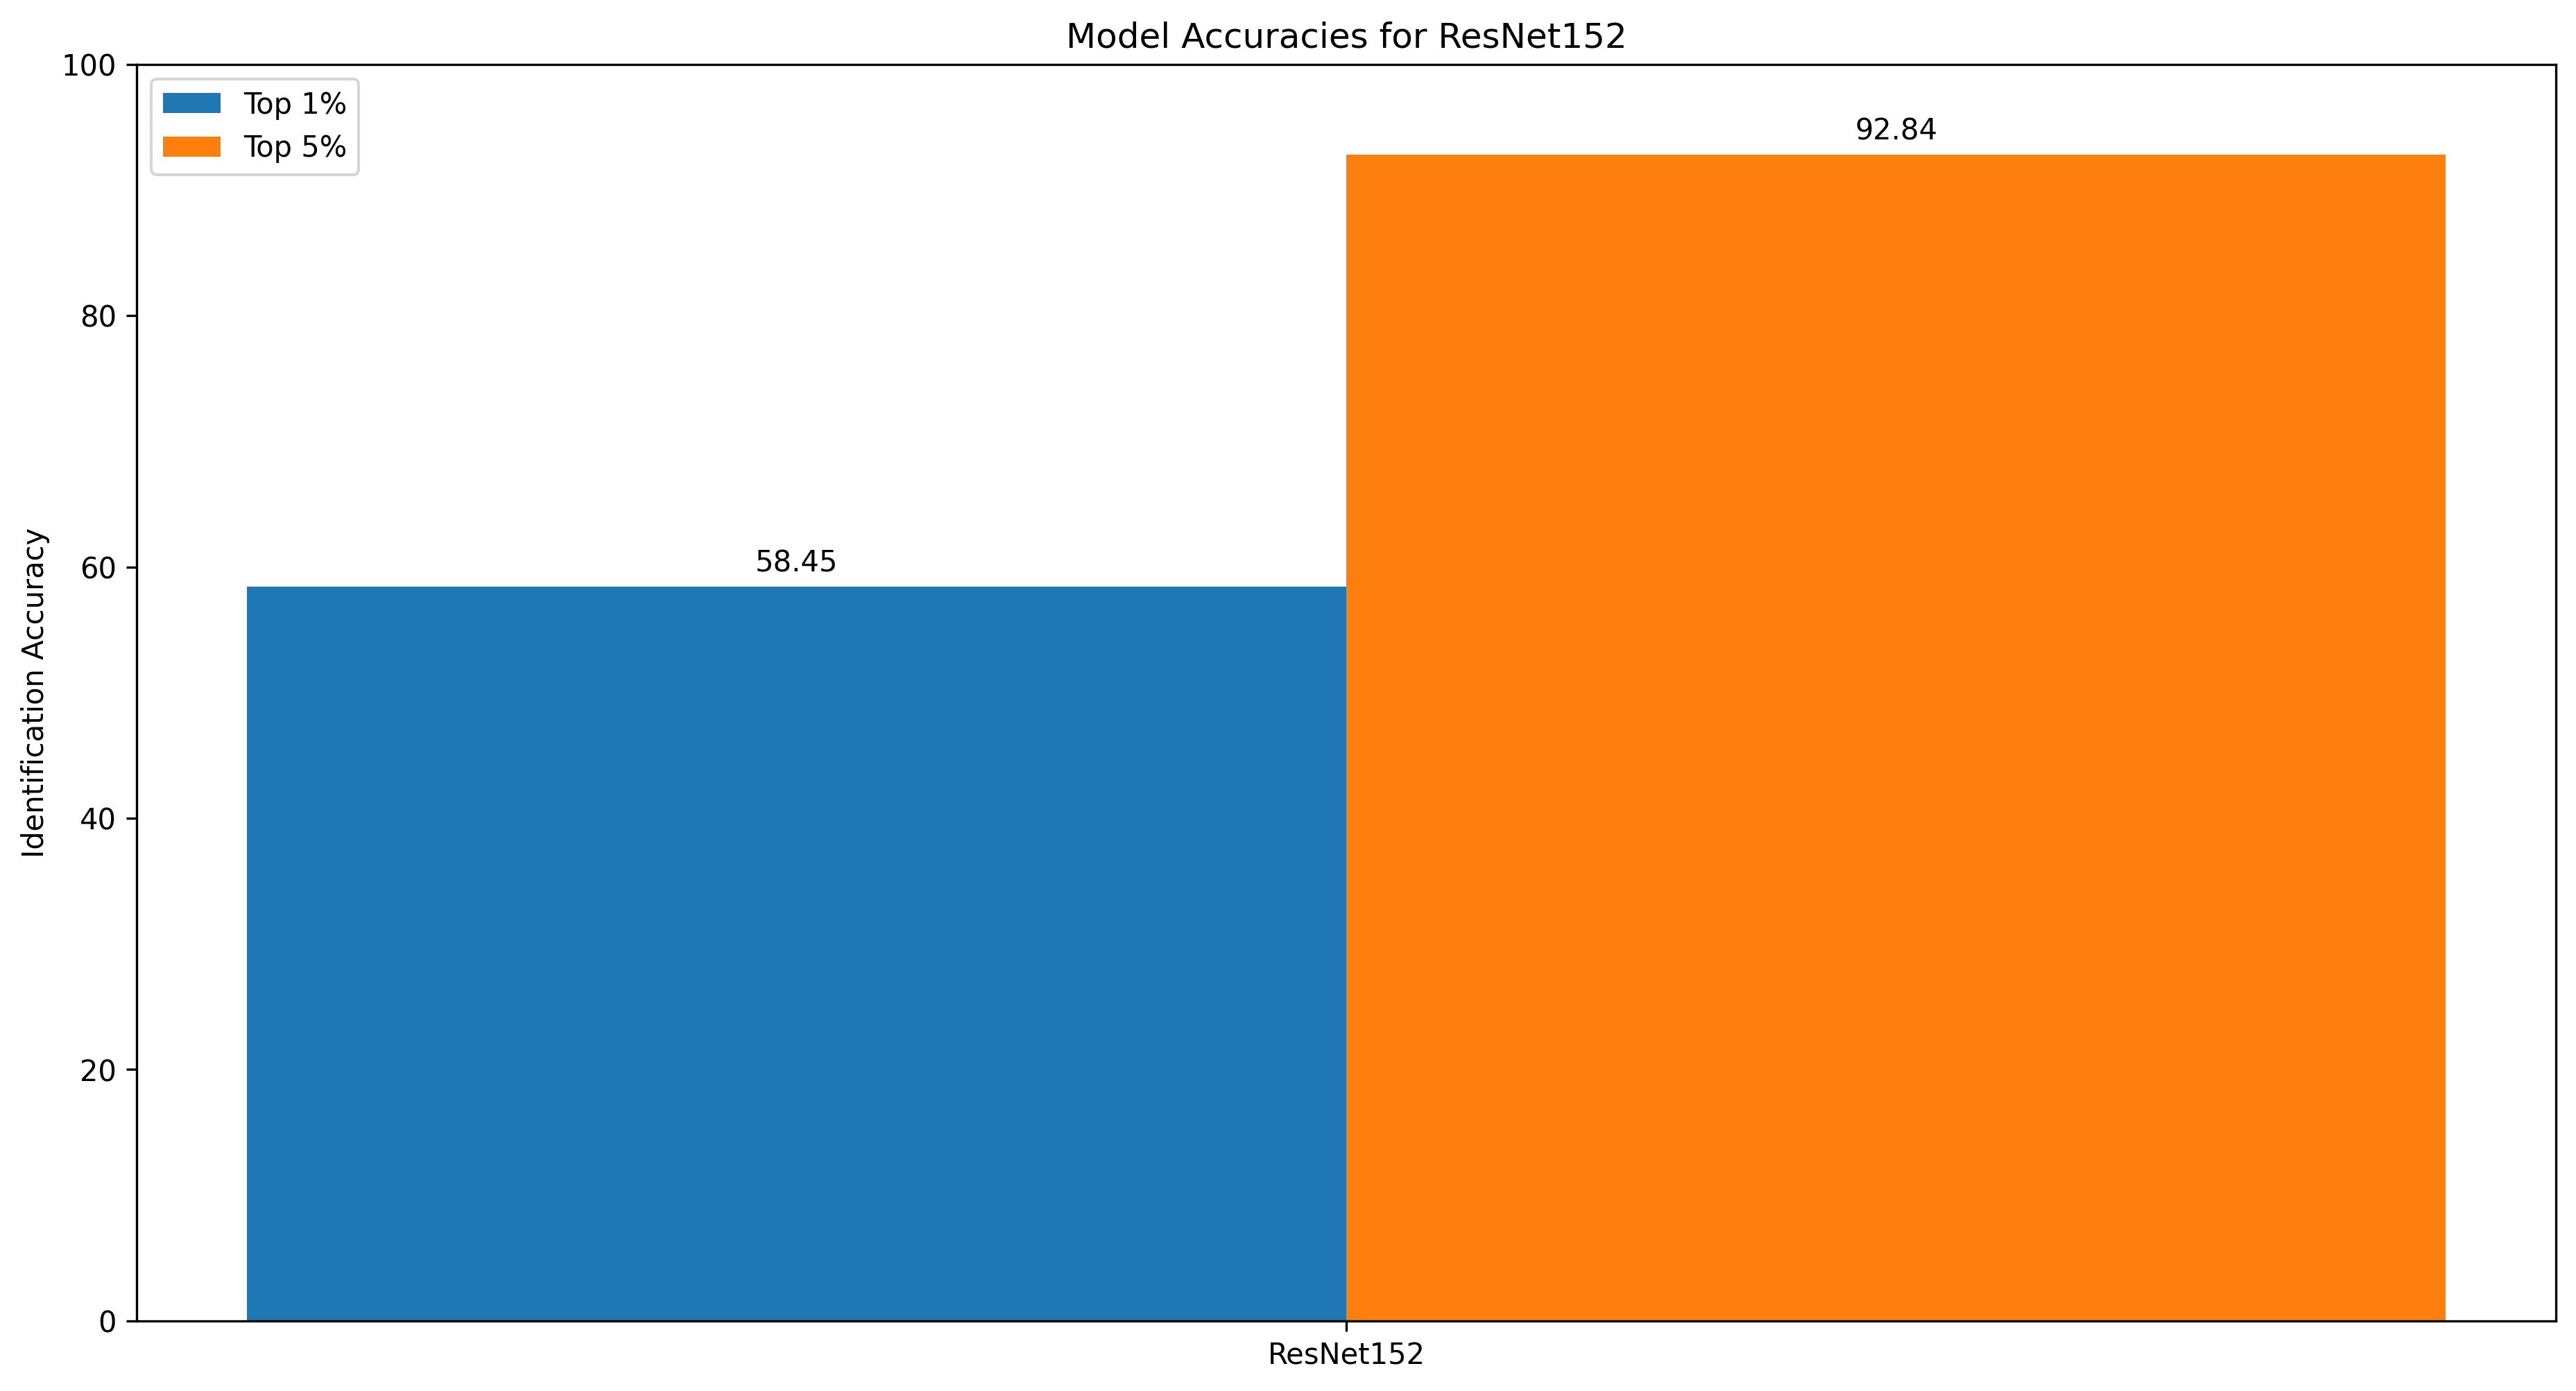

In [41]:
generate_model_accuracies('ResNet152')